In [42]:
import numpy as np

In [43]:
def data_load():
    f = open("/kaggle/input/cs771-kibergrad/train_responses.dat", "r")
    a = list(f.read().split("\n"))
    #print(a)
    b = []
    for i in a:
        if i:
            x = float(i)
            b.append(x)
    # a = [if i : float(i) for i in a]

    #print(len(b), len(a), b)

    f2 = open("/kaggle/input/cs771-kibergrad/train_challenges.dat", "r")
    c = list(f2.read().split("\n"))
    #print(c[2])
    d = []
    for i, x in enumerate(c):
        e = []
        if x:
            u = x.split(" ")
            for j in u:
                if j.isdigit():
                    e.append(j)
            #print(len(e))
        else:
            continue
        d.append(e)
    return np.asarray(d, dtype=float), np.asarray(b)

In [44]:
challenges, responses = data_load()
# responses

In [45]:
def train_test_split(data, targets, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    num_samples = len(data)
    num_test_samples = int(num_samples * test_size)
    shuffled_indices = np.random.permutation(num_samples)
    
    train_indices = shuffled_indices[:-num_test_samples]
    test_indices = shuffled_indices[-num_test_samples:]
    
    X_train = data[train_indices]
    y_train = targets[train_indices]
    X_test = data[test_indices]
    y_test = targets[test_indices]
    
    return X_train, X_test, y_train, y_test


In [46]:

X_train, X_val, y_train, y_val = train_test_split(challenges, responses, test_size=0.13, random_state=42)
y_train.shape


(1392,)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import time

def gradient(w, X, y):
    n = X.shape[0]
    diff = X.dot(w) - y.reshape(-1)
    grad = X.T.dot(diff) / n
    return grad

def projected_gradient_descent(X, y, learning_rate, max_iterations,threshold, regularization_lambda, momentum_factor):
    n, d = X.shape
    w = np.zeros(d)
    momentum = np.zeros(d)
    timestamps = []
    costs = [] 
    start_time = time.time()
    for iteration in range(max_iterations):
        grad = gradient(w, X, y)
        
        momentum = momentum * momentum_factor + learning_rate * grad  # Update momentum with Nesterov factor
        w_new = w - momentum
        
        # Apply non-negativity constraint
        w_new = np.maximum(0, w_new)
        
        # Apply hard thresholding
#         sorted_indices = np.argsort(np.abs(w_new))[::-1]
#         threshold = int(threshold)
#         w_new[sorted_indices[threshold:]] = 0
        
        # Compute the loss with regularization
        
        loss = (np.linalg.norm(X.dot(w_new) - y) ** 2 + regularization_lambda * np.linalg.norm(w_new) ** 2) / (2 * n)
        costs.append(loss)
        elapsed_time = time.time() - start_time
        timestamps.append(elapsed_time)
        
        if iteration % 300 == 0:
            print(f"Iteration: {iteration}, Loss: {loss}")
        
        if np.allclose(w, w_new):
            break
        
        w = w_new
    plt.plot(np.array(timestamps), costs)
    plt.xlabel("Time (s)")
    plt.ylabel("Cost")
    plt.title("Cost vs. Time")
    plt.yscale("log")  # Set y-axis to logarithmic scale
    plt.show()
    return w




In [65]:
import numpy as np

# Example array
arr = np.array([1, 2, 3, 3, 4, 4, 5, 5, 5])

# Get the number of unique elements
num_unique = np.max(weights)

# Print the number of unique elements
print("Number of unique elements:", num_unique)
print(X_train.shape)

Number of unique elements: 35.55854073142242
(1392, 2048)


In [92]:
count = np.count_nonzero(weights ==0)
count1 = np.count_nonzero(weights <1)
count2 = np.count_nonzero(weights >=1)
count3 = np.count_nonzero(weights <0.000001) ## ignoring weights tending to zero
print('number of connected CDUs : ', count2 + count1 - count3)


number of connected CDUs :  512


Iteration: 0, Loss: 5036308.14095696
Iteration: 300, Loss: 18.201323377308878
Iteration: 600, Loss: 0.4311015128420305
Iteration: 900, Loss: 0.18576183845731895
Iteration: 1200, Loss: 0.18268284944474997
Iteration: 1500, Loss: 0.182645742822262
Iteration: 1800, Loss: 0.18264589620124216
Iteration: 2100, Loss: 0.18264596596576885
Iteration: 2400, Loss: 0.1826459736076891


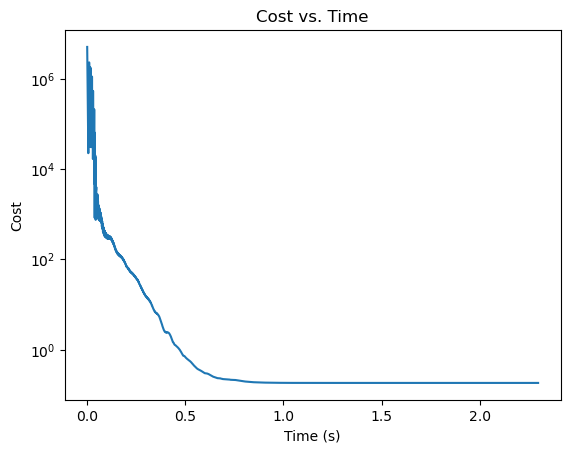

Final weights:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.52785439e+00
 5.39141194e-08 0.00000000e+00]


In [62]:
learning_rate = 0.005
max_iterations = 3000
momentum_factor = 0.99 # Value between 0 and 1 for momentum acceleration
regularization_lambda = 0.01
threshold = 512
# Perform projected gradient descent with momentum
weights = projected_gradient_descent(X_train, y_train, learning_rate, max_iterations, threshold, regularization_lambda, momentum_factor)

print("Final weights:")
print(weights)

#'learning_rate': 0.005, 'threshold': 512, 'max_iterations': 3000, 'momentum_factor': 0.99, 'regularization_lambda': 0.001
# w = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iterations, regularization, momentum)

In [56]:
X_val

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.]])

In [17]:
y_pred = X_val.dot(weights)
mse = np.mean((y_pred - y_val) ** 2)
print(f"Test MSE: {mse}")

Test MSE: 1.7612824354058686e-06


In [18]:
def r_squared(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2


In [19]:
# Assuming you have the true target values (y_true), predicted target values (y_pred), and weights (weights)

# Calculate the predicted target values
y_pred = X_val.dot(weights)

# Calculate the R-squared metric
accuracy = r_squared(y_val, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.9999999998618148


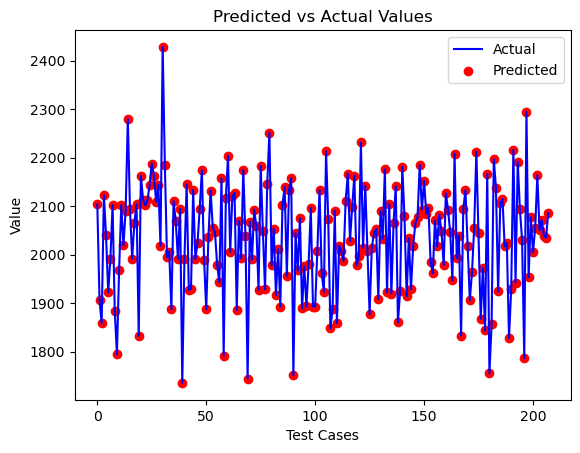

In [20]:
# Assuming you have the test dataset as X_test and y_test

# Make predictions on the test dataset
y_pred = X_val.dot(weights)

# Plot predicted and actual values
plt.figure()
plt.plot(np.arange(len(y_val)), y_val, color='blue', label='Actual')
plt.scatter(np.arange(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Test Cases')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


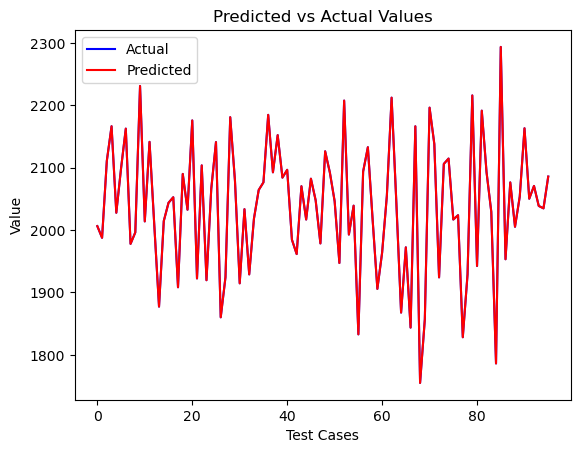

In [21]:
# Assuming you have the test dataset as X_test and y_test

# Make predictions on the test dataset
y_pred = X_val.dot(weights)

# Plot predicted and actual values
plt.figure()
plt.plot(np.arange(len(y_val)), y_val, color='blue', label='Actual')
plt.plot(np.arange(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Test Cases')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


In [28]:
y_pred = X_val.dot(best_weights)
mse = np.mean((y_pred - y_val) ** 2)
print(f"Test MSE: {mse}")

Test MSE: 2.1453442588382175e-12


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

def gradient(w, X, y):
    n = X.shape[0]
    diff = X.dot(w) - y.reshape(-1)
    grad = X.T.dot(diff) / n
    return grad

def projected_gradient_descent(X, y, learning_rate, threshold, max_iterations, regularization_lambda, momentum_factor):
    n, d = X.shape
    w = np.zeros(d)
    momentum = np.zeros(d)
    timestamps = []
    costs = [] 
    start_time = time.time()
    for iteration in range(max_iterations):
        grad = gradient(w, X, y)
        
        momentum = momentum * momentum_factor + learning_rate * grad  # Update momentum with Nesterov factor
        w_new = w - momentum
        
        # Apply non-negativity constraint
        w_new = np.maximum(0, w_new)
        
        # Compute the loss with regularization
        loss = (np.linalg.norm(X.dot(w_new) - y) ** 2 + regularization_lambda * np.linalg.norm(w_new) ** 2) / (2 * n)
        costs.append(loss)
        elapsed_time = time.time() - start_time
        timestamps.append(elapsed_time)
        
        if iteration % 400 == 0:
            print(f"Iteration: {iteration}, Loss: {loss}")
        
        if np.allclose(w, w_new):
            break
        
        w = w_new
    
#     plt.plot(np.array(timestamps), costs)
#     plt.xlabel("Time (s)")
#     plt.ylabel("Cost")
#     plt.title("Cost vs. Time")
#     plt.yscale("log")  # Set y-axis to logarithmic scale
#     plt.show()
    
    return w

Iteration: 0, Loss: 5036307.970530282
Iteration: 400, Loss: 4.808139424476537
Iteration: 800, Loss: 0.032448758294341344
Iteration: 1200, Loss: 0.018309185419122985
{'learning_rate': 0.005, 'max_iterations': 1500, 'momentum_factor': 0.99, 'regularization_lambda': 0.001}

Iteration: 0, Loss: 5036308.14095696
Iteration: 400, Loss: 4.970154016196994
Iteration: 800, Loss: 0.196715599689074
Iteration: 1200, Loss: 0.18268284944474997
{'learning_rate': 0.005, 'max_iterations': 1500, 'momentum_factor': 0.99, 'regularization_lambda': 0.01}

Iteration: 0, Loss: 5036307.970530282
Iteration: 400, Loss: 4.808139424476537
Iteration: 800, Loss: 0.032448758294341344
Iteration: 1200, Loss: 0.018309185419122985
Iteration: 1600, Loss: 0.01826469521422942
Iteration: 2000, Loss: 0.018264595634363164
Iteration: 2400, Loss: 0.018264597361943143
{'learning_rate': 0.005, 'max_iterations': 3000, 'momentum_factor': 0.99, 'regularization_lambda': 0.001}

Iteration: 0, Loss: 5036308.14095696
Iteration: 400, Loss: 

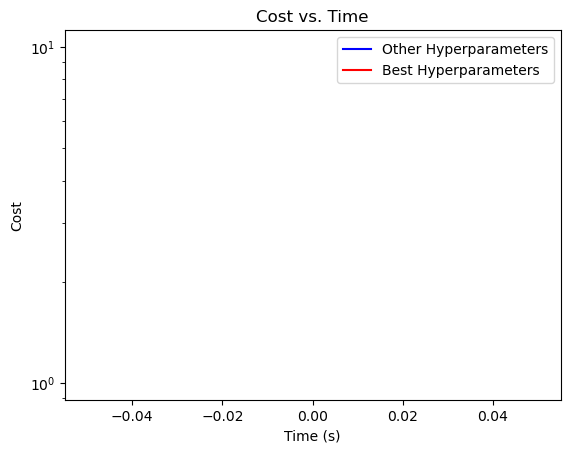

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Rest of the code...
# Define the hyperparameter grid
learning_rates = [0.005, 0.008, 0.01]
max_iterations = [1500, 3000]
momentum_factors = [0.99]
regularization_lambdas = [0.001, 0.01]
thresholds = [512]
best_params = {}
best_loss = float('inf')  

# Initialize timestamps and costs lists
timestamps = []
costs = []

# Perform grid search
colors = ['red', 'blue']
for learning_rate in learning_rates:
    for threshold in thresholds:
        for max_iter in max_iterations:
            for momentum_factor in momentum_factors:
                for regularization_lambda in regularization_lambdas:
                    # Reset timestamps and costs for each set of hyperparameters
                    timestamps = []
                    costs = []
                    
                    # Perform projected gradient descent with current hyperparameters
                    weights = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iter, regularization_lambda, momentum_factor)
                    
                    # Record timestamps and costs during gradient descent
                    timestamps.extend(range(len(costs)))
                    costs.extend(costs)
                    
                    # Compute the loss with current hyperparameters
                    loss = (np.linalg.norm(X_train.dot(weights) - y_train) ** 2 + regularization_lambda * np.linalg.norm(weights) ** 2) / (2 * len(X_train))
                    params = {
                            'learning_rate': learning_rate,
                            'max_iterations': max_iter,
                            'momentum_factor': momentum_factor,
                            'regularization_lambda': regularization_lambda
                    }
                    print(params)
                    print()
                    # Update the best hyperparameters if the current loss is lower
                    if loss < best_loss:
                        best_loss = loss
                        best_params = {
                            'learning_rate': learning_rate,
                            'max_iterations': max_iter,
                            'momentum_factor': momentum_factor,
                            'regularization_lambda': regularization_lambda
                        }
                    
                    # Plot the cost vs. time for current hyperparameters
                    plt.plot(np.array(timestamps), costs, color=colors[int(loss == best_loss)])

                    
                  
                    
# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Plot settings
plt.xlabel("Time (s)")
plt.ylabel("Cost")
plt.title("Cost vs. Time")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.legend(['Other Hyperparameters', 'Best Hyperparameters'])
plt.show()


Iteration: 0, Loss: 493046.610595271
Iteration: 400, Loss: 497.5236803841026
Iteration: 800, Loss: 230.75144930859193
Iteration: 1200, Loss: 141.21679379947028


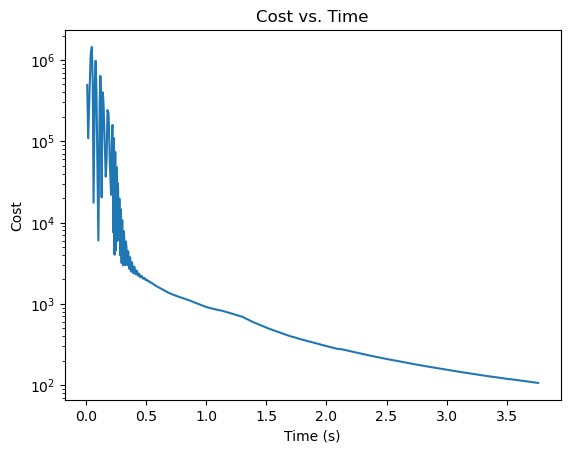

Iteration: 0, Loss: 493046.61362507864
Iteration: 400, Loss: 497.5520384883751
Iteration: 800, Loss: 230.78792081368186
Iteration: 1200, Loss: 141.2582446411418


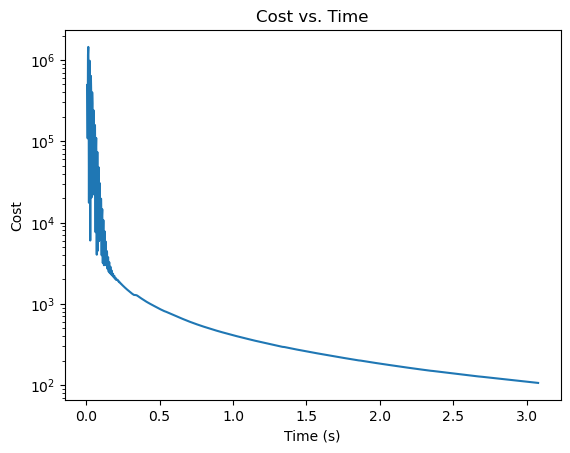

Iteration: 0, Loss: 493046.61741233815
Iteration: 400, Loss: 497.58748611871573
Iteration: 800, Loss: 230.83351019504425
Iteration: 1200, Loss: 141.31005819323119


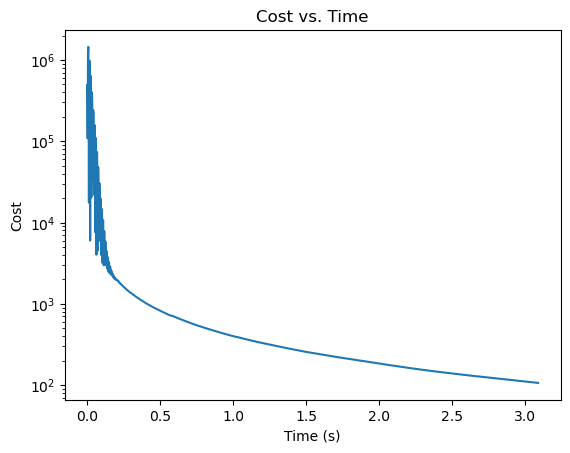

Iteration: 0, Loss: 493046.68558300927
Iteration: 400, Loss: 498.22554346484725
Iteration: 800, Loss: 231.65411905956736
Iteration: 1200, Loss: 142.2427021308405


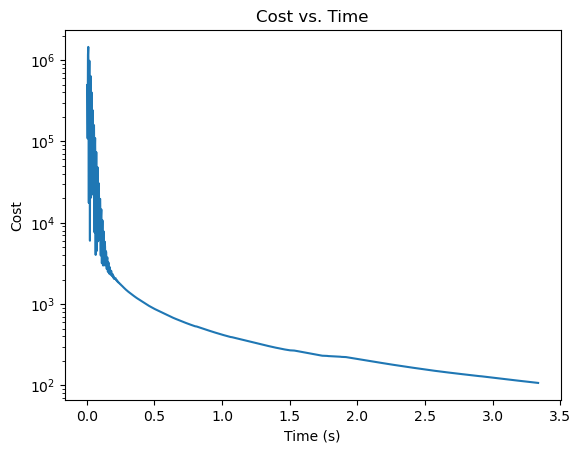

Iteration: 0, Loss: 493046.610595271
Iteration: 400, Loss: 227.23522925797326
Iteration: 800, Loss: 96.15144563032499
Iteration: 1200, Loss: 54.863744004445415


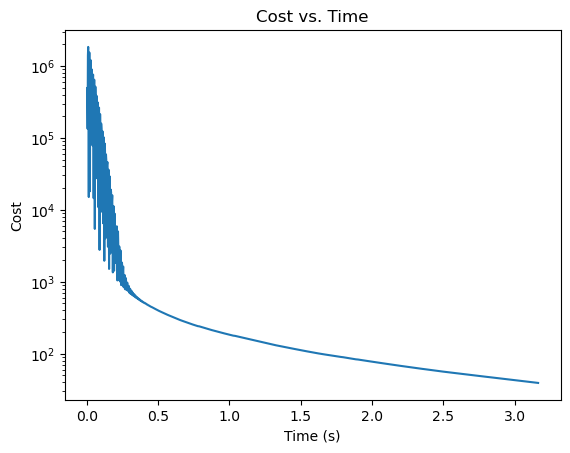

Iteration: 0, Loss: 493046.61362507864
Iteration: 400, Loss: 227.27204009204823
Iteration: 800, Loss: 96.196660987811
Iteration: 1200, Loss: 54.91384942185762


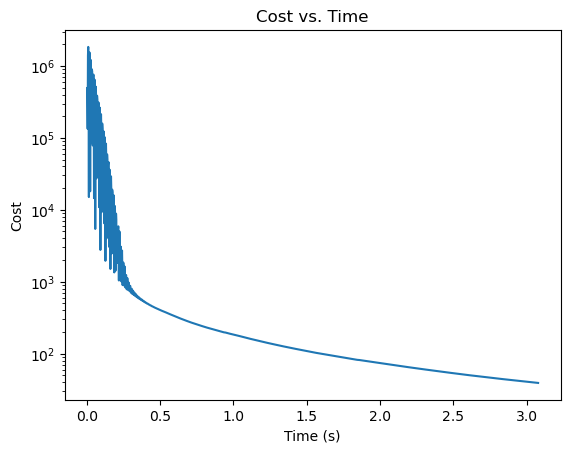

Iteration: 0, Loss: 493046.61741233815
Iteration: 400, Loss: 227.31805363464198
Iteration: 800, Loss: 96.25318018466851
Iteration: 1200, Loss: 54.97648119362288


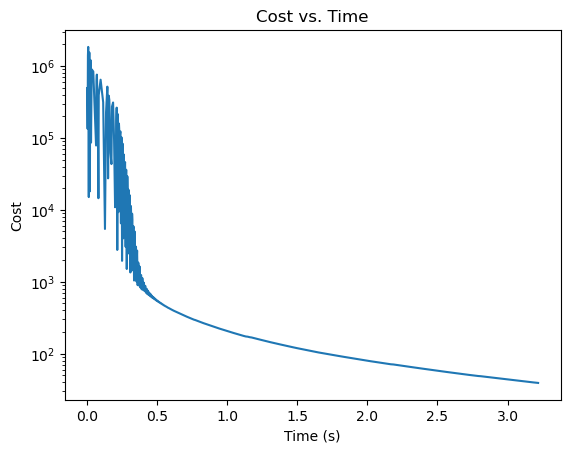

Iteration: 0, Loss: 493046.68558300927
Iteration: 400, Loss: 228.14629740132935
Iteration: 800, Loss: 97.27052572810369
Iteration: 1200, Loss: 56.10385308539756


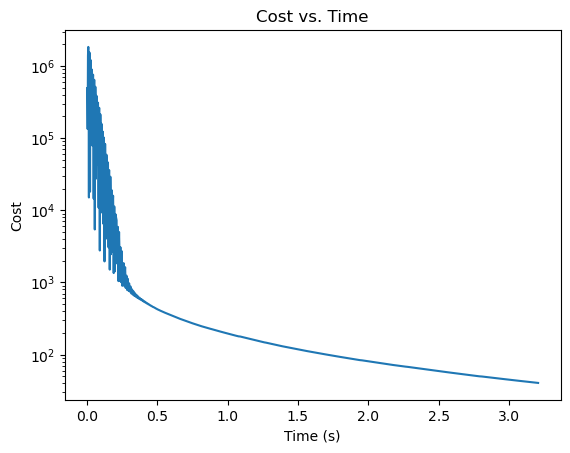

Iteration: 0, Loss: 493046.610595271
Iteration: 400, Loss: 35.433573865769326
Iteration: 800, Loss: 4.191466756584189
Iteration: 1200, Loss: 1.4777943042128459


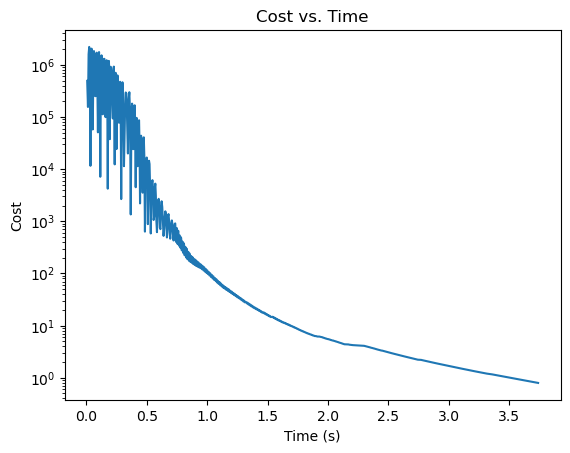

Iteration: 0, Loss: 493046.61362507864
Iteration: 400, Loss: 35.494549621092105
Iteration: 800, Loss: 4.257259481647736
Iteration: 1200, Loss: 1.5461608409784993


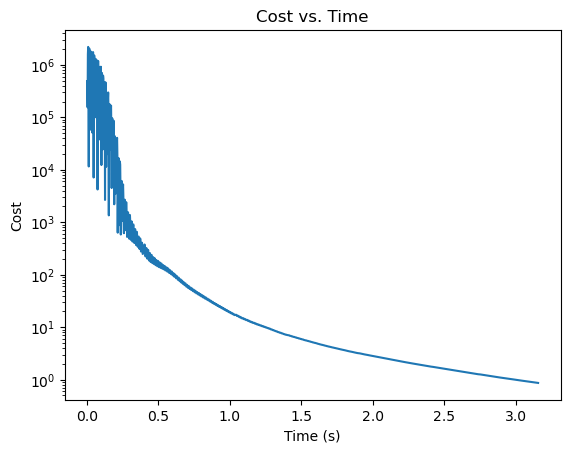

Iteration: 0, Loss: 493046.61741233815
Iteration: 400, Loss: 35.57076931524558
Iteration: 800, Loss: 4.33950038797717
Iteration: 1200, Loss: 1.6316190119355658


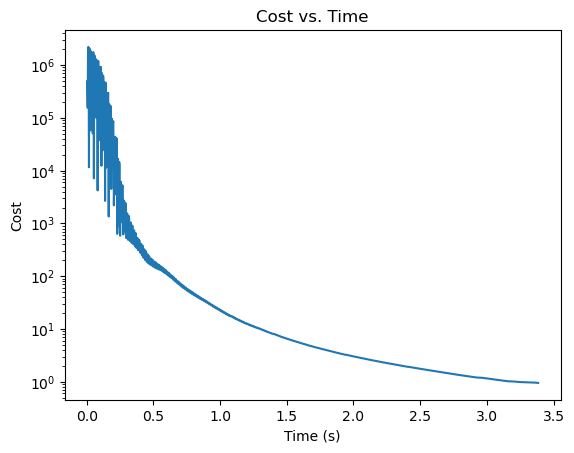

Iteration: 0, Loss: 493046.68558300927
Iteration: 400, Loss: 36.94272381000807
Iteration: 800, Loss: 5.819836701906979
Iteration: 1200, Loss: 3.169866089162768


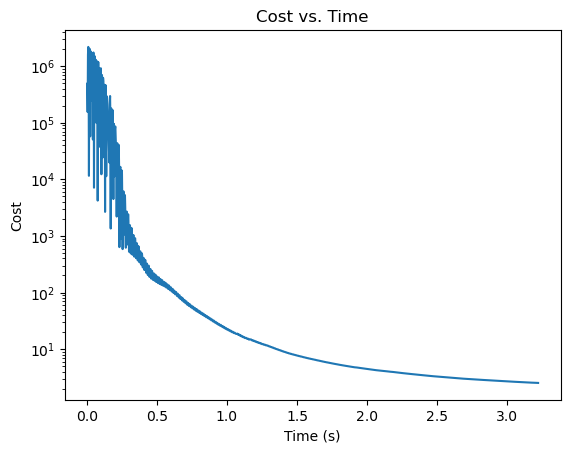

Iteration: 0, Loss: 493046.610595271
Iteration: 400, Loss: 497.5236803841026
Iteration: 800, Loss: 230.75144930859193
Iteration: 1200, Loss: 141.21679379947028
Iteration: 1600, Loss: 97.5693644814685
Iteration: 2000, Loss: 72.10840946732121
Iteration: 2400, Loss: 55.63361078578908
Iteration: 2800, Loss: 44.18778186655169


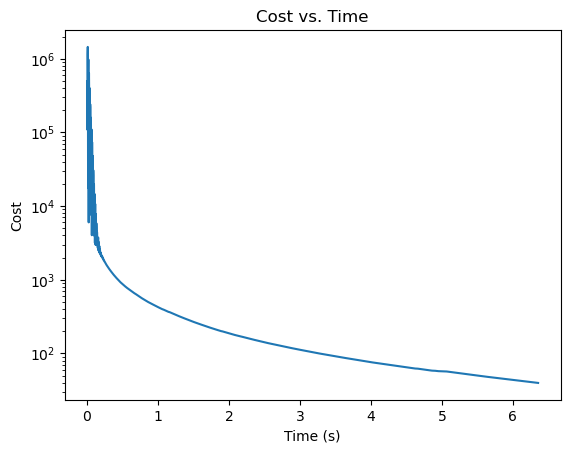

Iteration: 0, Loss: 493046.61362507864
Iteration: 400, Loss: 497.5520384883751
Iteration: 800, Loss: 230.78792081368186
Iteration: 1200, Loss: 141.2582446411418
Iteration: 1600, Loss: 97.61436285592261
Iteration: 2000, Loss: 72.15614515568919
Iteration: 2400, Loss: 55.68355361231869
Iteration: 2800, Loss: 44.23957700893712


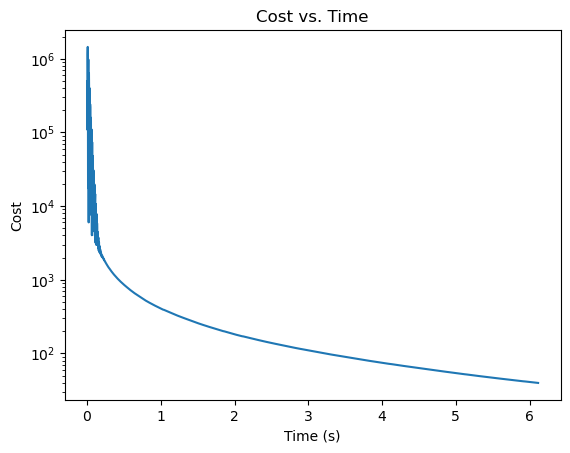

Iteration: 0, Loss: 493046.61741233815
Iteration: 400, Loss: 497.58748611871573
Iteration: 800, Loss: 230.83351019504425
Iteration: 1200, Loss: 141.31005819323119
Iteration: 1600, Loss: 97.67061082399024
Iteration: 2000, Loss: 72.21581476614912
Iteration: 2400, Loss: 55.7459821454807
Iteration: 2800, Loss: 44.304320936918906


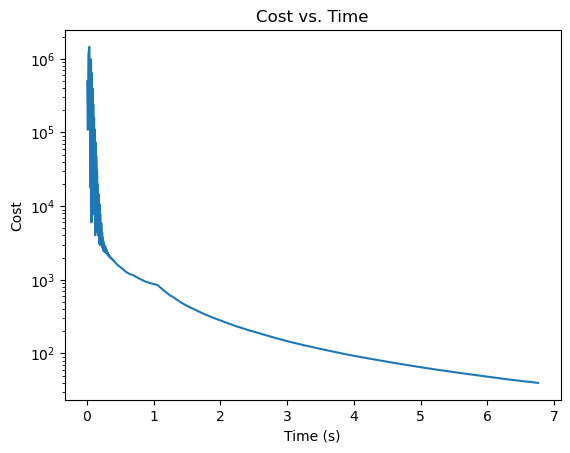

Iteration: 0, Loss: 493046.68558300927
Iteration: 400, Loss: 498.22554346484725
Iteration: 800, Loss: 231.65411905956736
Iteration: 1200, Loss: 142.2427021308405
Iteration: 1600, Loss: 98.68307424920766
Iteration: 2000, Loss: 73.28986775442829
Iteration: 2400, Loss: 56.86969574239696
Iteration: 2800, Loss: 45.46971164059107


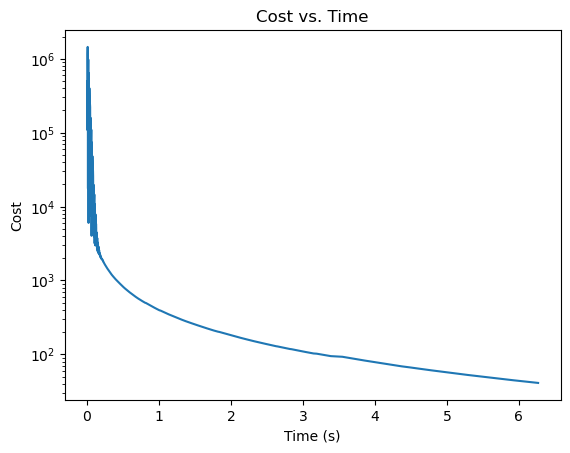

Iteration: 0, Loss: 493046.610595271
Iteration: 400, Loss: 227.23522925797326
Iteration: 800, Loss: 96.15144563032499
Iteration: 1200, Loss: 54.863744004445415
Iteration: 1600, Loss: 35.385008686112315
Iteration: 2000, Loss: 24.504821846099805
Iteration: 2400, Loss: 17.857873757154724
Iteration: 2800, Loss: 13.448006721518805


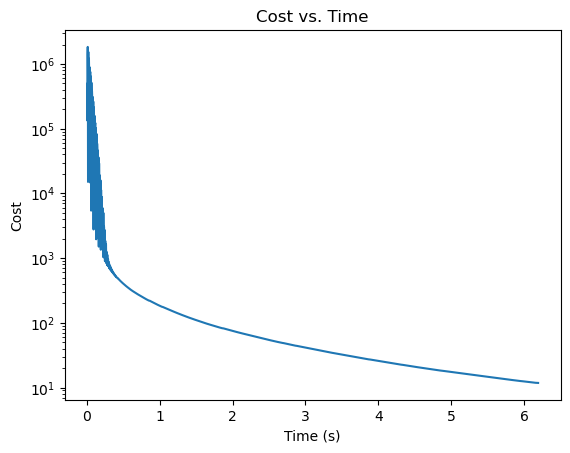

Iteration: 0, Loss: 493046.61362507864
Iteration: 400, Loss: 227.27204009204823
Iteration: 800, Loss: 96.196660987811
Iteration: 1200, Loss: 54.91384942185762
Iteration: 1600, Loss: 35.43853048562581
Iteration: 2000, Loss: 24.560942974154518
Iteration: 2400, Loss: 17.916027324652354
Iteration: 2800, Loss: 13.50781364922546


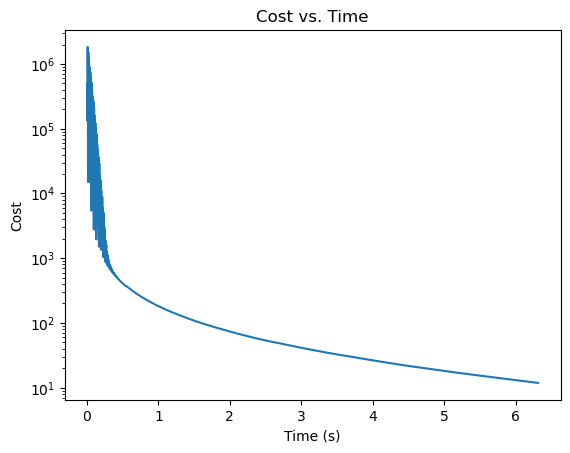

Iteration: 0, Loss: 493046.61741233815
Iteration: 400, Loss: 227.31805363464198
Iteration: 800, Loss: 96.25318018466851
Iteration: 1200, Loss: 54.97648119362288
Iteration: 1600, Loss: 35.50543273501769
Iteration: 2000, Loss: 24.63109438422291
Iteration: 2400, Loss: 17.98871928402439
Iteration: 2800, Loss: 13.582572308858776


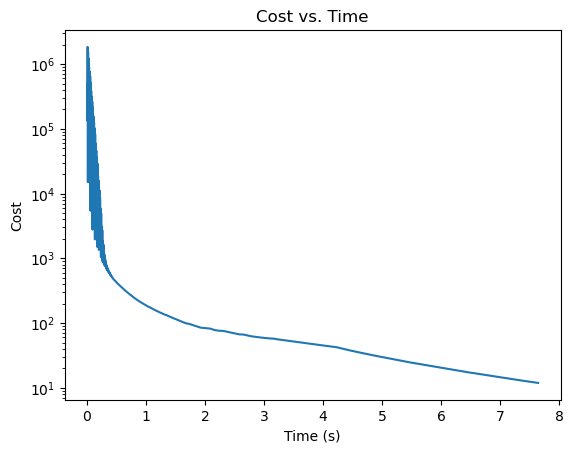

Iteration: 0, Loss: 493046.68558300927
Iteration: 400, Loss: 228.14629740132935
Iteration: 800, Loss: 97.27052572810369
Iteration: 1200, Loss: 56.10385308539756
Iteration: 1600, Loss: 36.70967322407152
Iteration: 2000, Loss: 25.893819765453983
Iteration: 2400, Loss: 19.297174552721064
Iteration: 2800, Loss: 14.928228182258481


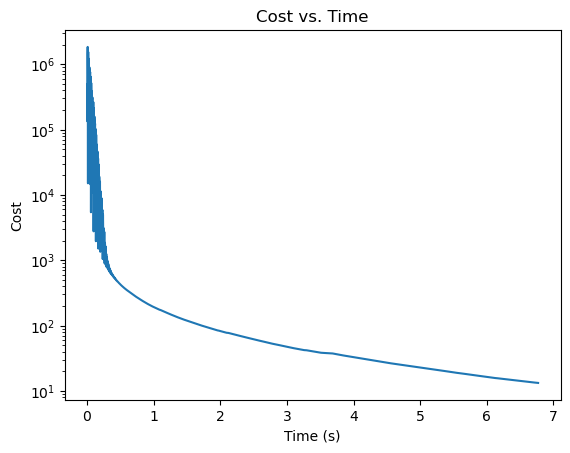

Iteration: 0, Loss: 493046.610595271
Iteration: 400, Loss: 35.433573865769326
Iteration: 800, Loss: 4.191466756584189
Iteration: 1200, Loss: 1.4777943042128459
Iteration: 1600, Loss: 0.654073642953577
Iteration: 2000, Loss: 0.3202309587887198
Iteration: 2400, Loss: 0.16875839300560092
Iteration: 2800, Loss: 0.09549269003122006


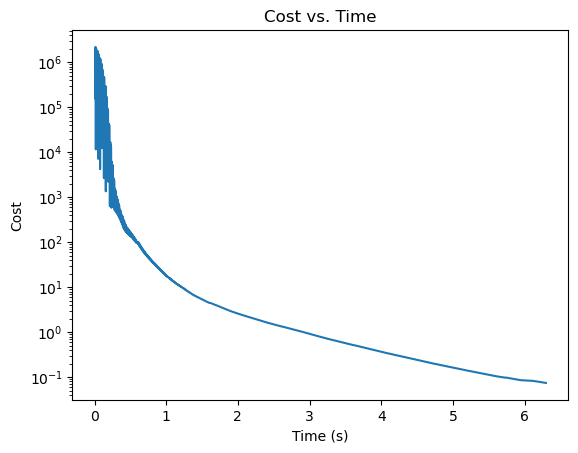

Iteration: 0, Loss: 493046.61362507864
Iteration: 400, Loss: 35.494549621092105
Iteration: 800, Loss: 4.257259481647736
Iteration: 1200, Loss: 1.5461608409784993
Iteration: 1600, Loss: 0.7239336220785415
Iteration: 2000, Loss: 0.39104443889420204
Iteration: 2400, Loss: 0.24020922553788926
Iteration: 2800, Loss: 0.1673854455147596


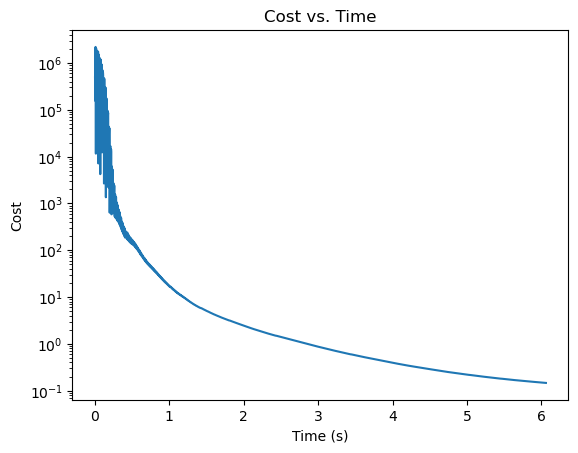

Iteration: 0, Loss: 493046.61741233815
Iteration: 400, Loss: 35.57076931524558
Iteration: 800, Loss: 4.33950038797717
Iteration: 1200, Loss: 1.6316190119355658
Iteration: 1600, Loss: 0.811258595984747
Iteration: 2000, Loss: 0.4795612890260547
Iteration: 2400, Loss: 0.32952276620324966
Iteration: 2800, Loss: 0.257251389869184


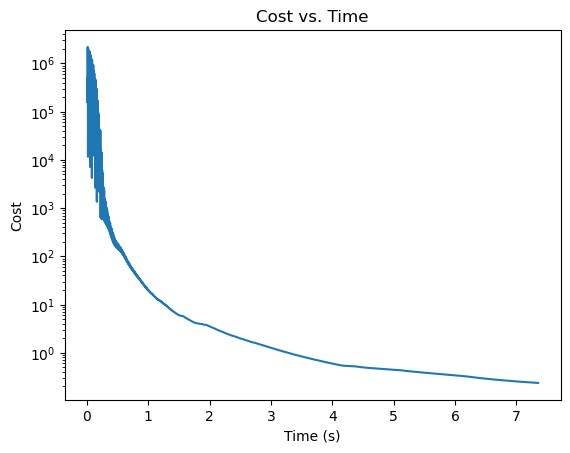

Iteration: 0, Loss: 493046.68558300927
Iteration: 400, Loss: 36.94272381000807
Iteration: 800, Loss: 5.819836701906979
Iteration: 1200, Loss: 3.169866089162768
Iteration: 1600, Loss: 2.383108126296449
Iteration: 2000, Loss: 2.0728645913994037
Iteration: 2400, Loss: 1.9371664981797374
Iteration: 2800, Loss: 1.8748383882488238


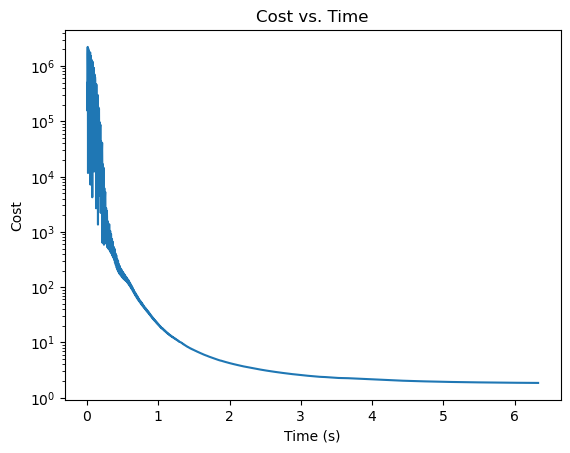

Iteration: 0, Loss: 601636.3345314569
Iteration: 400, Loss: 139.37425456115398
Iteration: 800, Loss: 55.00854714321497
Iteration: 1200, Loss: 29.326867518218897


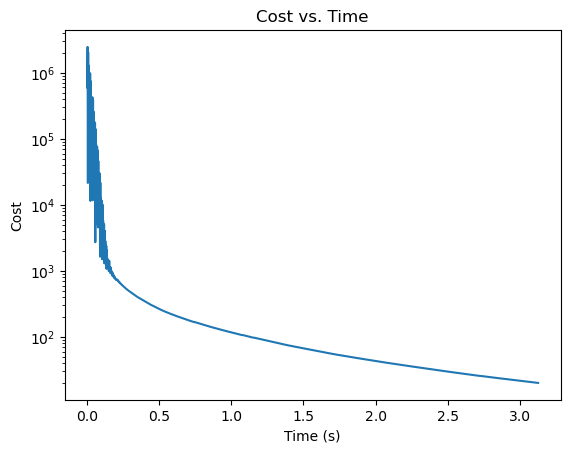

Iteration: 0, Loss: 601636.3617997253
Iteration: 400, Loss: 139.4159027636398
Iteration: 800, Loss: 55.0586128877723
Iteration: 1200, Loss: 29.381739145844584


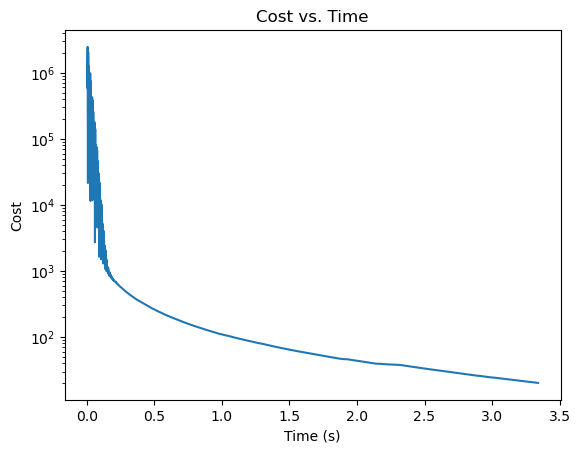

Iteration: 0, Loss: 601636.3958850609
Iteration: 400, Loss: 139.46796301674703
Iteration: 800, Loss: 55.12119506846898
Iteration: 1200, Loss: 29.450328680376682


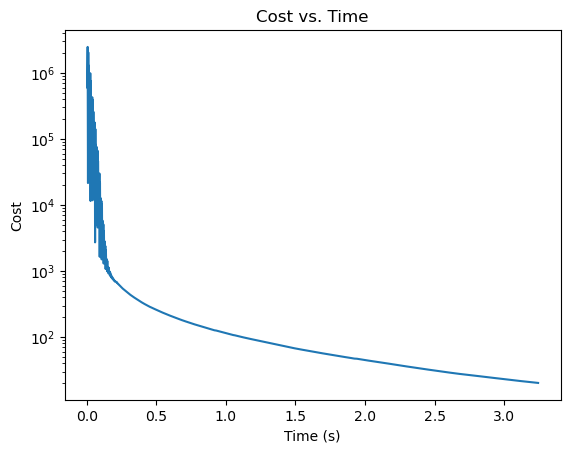

Iteration: 0, Loss: 601637.0094211012
Iteration: 400, Loss: 140.40504757267763
Iteration: 800, Loss: 56.24767432100902
Iteration: 1200, Loss: 30.684940301954548


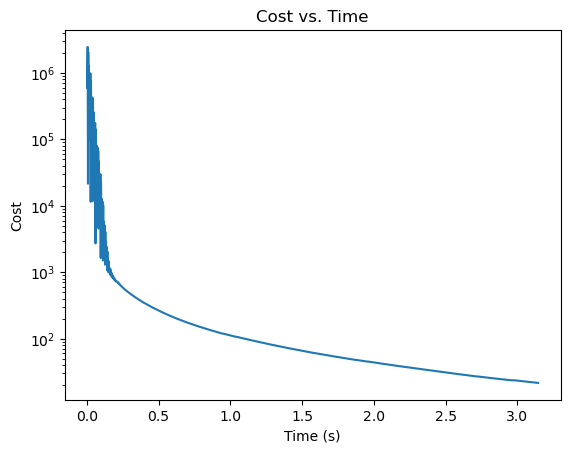

Iteration: 0, Loss: 601636.3345314569
Iteration: 400, Loss: 52.17664881850075
Iteration: 800, Loss: 17.154014722847794
Iteration: 1200, Loss: 7.836964166050829


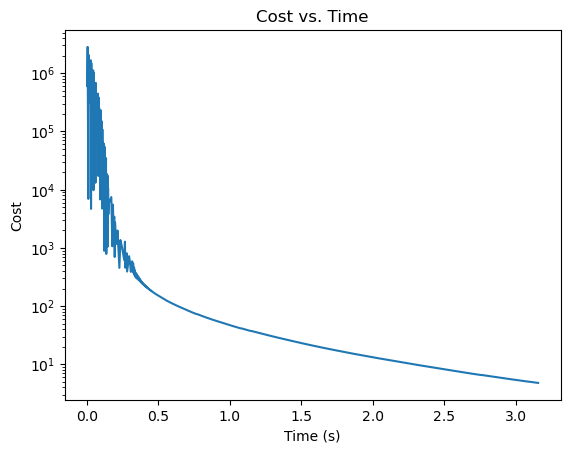

Iteration: 0, Loss: 601636.3617997253
Iteration: 400, Loss: 52.227318564361646
Iteration: 800, Loss: 17.212480369257364
Iteration: 1200, Loss: 7.899540808880006


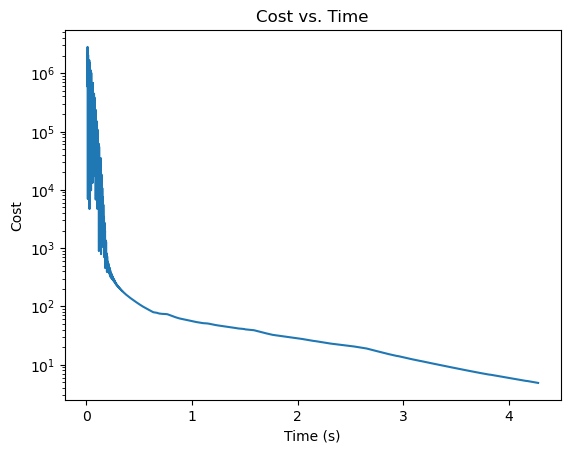

Iteration: 0, Loss: 601636.3958850609
Iteration: 400, Loss: 52.29065574668777
Iteration: 800, Loss: 17.285562427269323
Iteration: 1200, Loss: 7.977761612416475


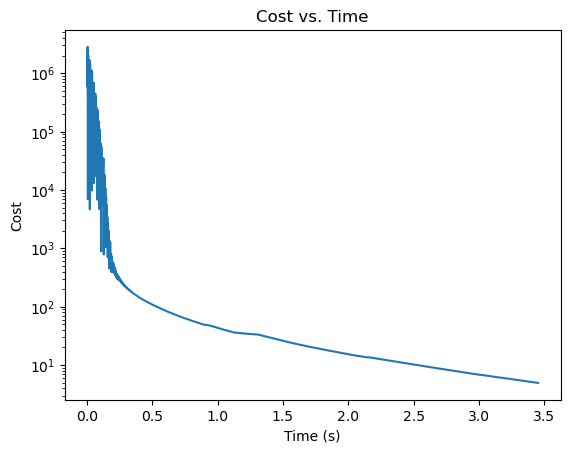

Iteration: 0, Loss: 601637.0094211012
Iteration: 400, Loss: 53.430725028557816
Iteration: 800, Loss: 18.601039471484608
Iteration: 1200, Loss: 9.385736076072924


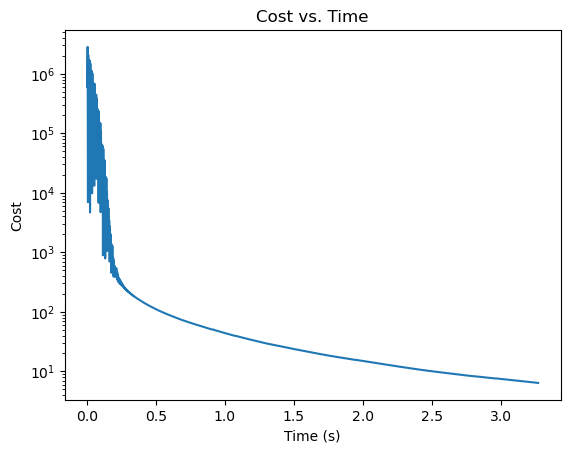

Iteration: 0, Loss: 601636.3345314569
Iteration: 400, Loss: 8.325112882159116
Iteration: 800, Loss: 0.10246945340178783
Iteration: 1200, Loss: 0.02020290411171457


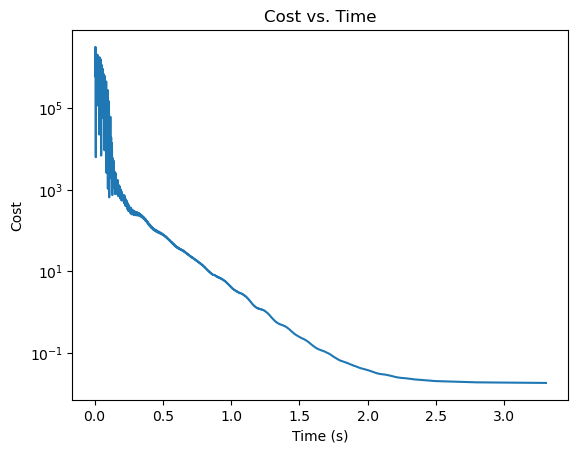

Iteration: 0, Loss: 601636.3617997253
Iteration: 400, Loss: 8.395467419222147
Iteration: 800, Loss: 0.17497409308620016
Iteration: 1200, Loss: 0.09311948649107861


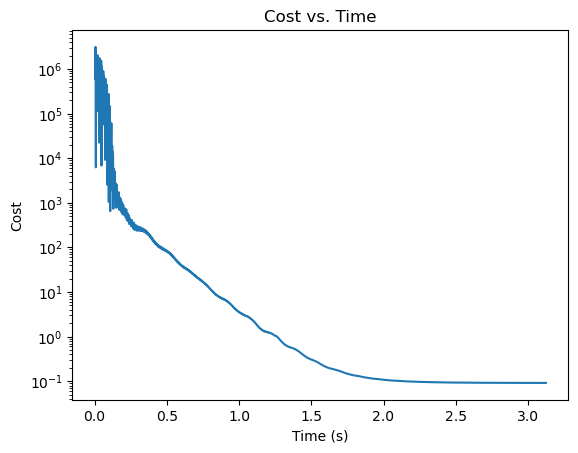

Iteration: 0, Loss: 601636.3958850609
Iteration: 400, Loss: 8.483410590550934
Iteration: 800, Loss: 0.26560489269171556
Iteration: 1200, Loss: 0.18426521446528366


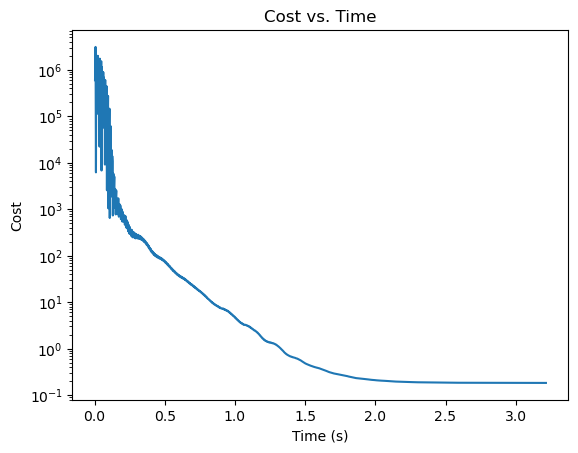

Iteration: 0, Loss: 601637.0094211012
Iteration: 400, Loss: 10.066387674469109
Iteration: 800, Loss: 1.8969592855909927
Iteration: 1200, Loss: 1.8248883180009747


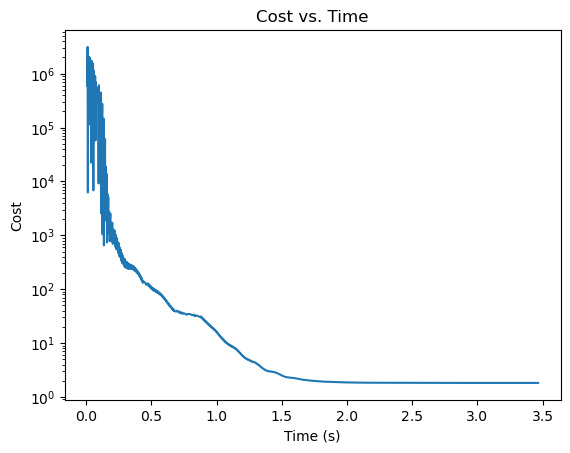

Iteration: 0, Loss: 601636.3345314569
Iteration: 400, Loss: 139.37425456115398
Iteration: 800, Loss: 55.00854714321497
Iteration: 1200, Loss: 29.326867518218897
Iteration: 1600, Loss: 17.91361144396218
Iteration: 2000, Loss: 11.813691185393969
Iteration: 2400, Loss: 8.160056689084866
Iteration: 2800, Loss: 5.829121501896319


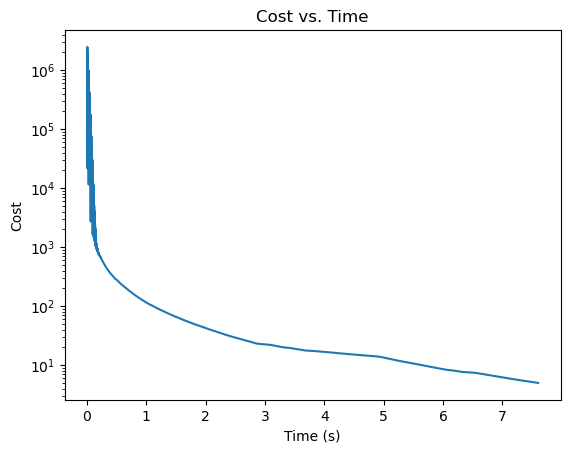

Iteration: 0, Loss: 601636.3617997253
Iteration: 400, Loss: 139.4159027636398
Iteration: 800, Loss: 55.0586128877723
Iteration: 1200, Loss: 29.381739145844584
Iteration: 1600, Loss: 17.971738778401523
Iteration: 2000, Loss: 11.87419628950025
Iteration: 2400, Loss: 8.222404720251665
Iteration: 2800, Loss: 5.89293586463314


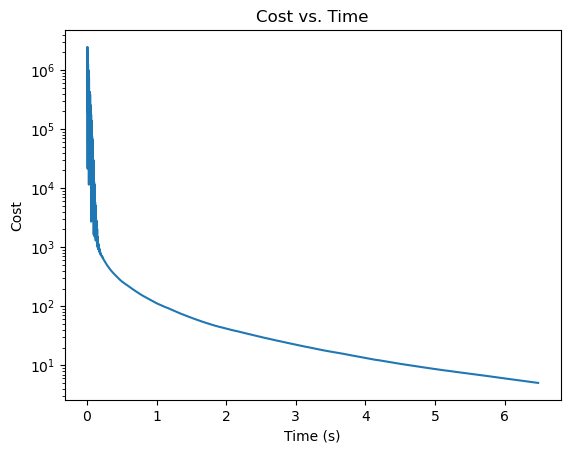

Iteration: 0, Loss: 601636.3958850609
Iteration: 400, Loss: 139.46796301674703
Iteration: 800, Loss: 55.12119506846898
Iteration: 1200, Loss: 29.450328680376682
Iteration: 1600, Loss: 18.0443979464507
Iteration: 2000, Loss: 11.949827669633105
Iteration: 2400, Loss: 8.300339759210166
Iteration: 2800, Loss: 5.972703818054167


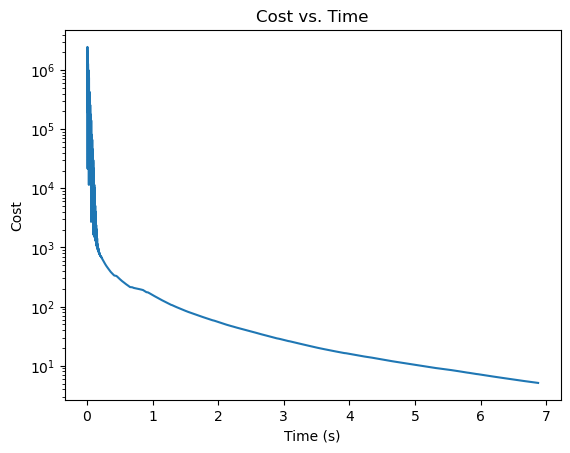

Iteration: 0, Loss: 601637.0094211012
Iteration: 400, Loss: 140.40504757267763
Iteration: 800, Loss: 56.24767432100902
Iteration: 1200, Loss: 30.684940301954548
Iteration: 1600, Loss: 19.35226297133592
Iteration: 2000, Loss: 13.31119251202447
Iteration: 2400, Loss: 9.703170460463177
Iteration: 2800, Loss: 7.4085269796326445


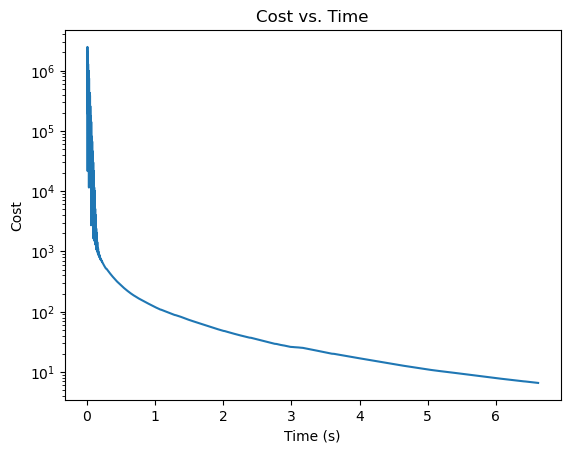

Iteration: 0, Loss: 601636.3345314569
Iteration: 400, Loss: 52.17664881850075
Iteration: 800, Loss: 17.154014722847794
Iteration: 1200, Loss: 7.836964166050829
Iteration: 1600, Loss: 4.108146575470836
Iteration: 2000, Loss: 2.338345592594016
Iteration: 2400, Loss: 1.408931086544953
Iteration: 2800, Loss: 0.886943300903487


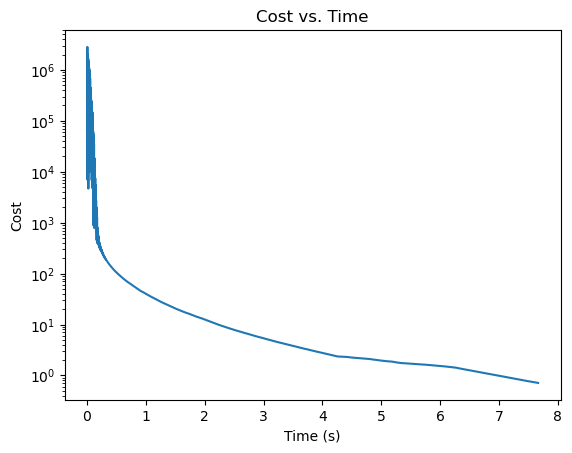

Iteration: 0, Loss: 601636.3617997253
Iteration: 400, Loss: 52.227318564361646
Iteration: 800, Loss: 17.212480369257364
Iteration: 1200, Loss: 7.899540808880006
Iteration: 1600, Loss: 4.17332059405265
Iteration: 2000, Loss: 2.405302316175237
Iteration: 2400, Loss: 1.4771762791884895
Iteration: 2800, Loss: 0.9561470223394426


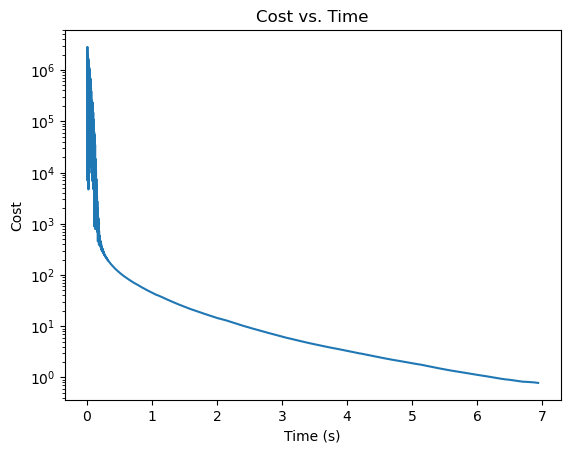

Iteration: 0, Loss: 601636.3958850609
Iteration: 400, Loss: 52.29065574668777
Iteration: 800, Loss: 17.285562427269323
Iteration: 1200, Loss: 7.977761612416475
Iteration: 1600, Loss: 4.254788117279917
Iteration: 2000, Loss: 2.4889982206517627
Iteration: 2400, Loss: 1.5624827699929105
Iteration: 2800, Loss: 1.0426516741343872


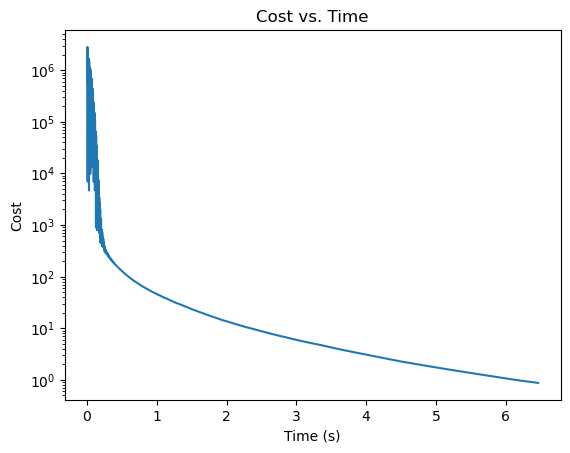

Iteration: 0, Loss: 601637.0094211012
Iteration: 400, Loss: 53.430725028557816
Iteration: 800, Loss: 18.601039471484608
Iteration: 1200, Loss: 9.385736076072924
Iteration: 1600, Loss: 5.721203535370722
Iteration: 2000, Loss: 3.995524501229231
Iteration: 2400, Loss: 3.0979996044724882
Iteration: 2800, Loss: 2.599735406443387


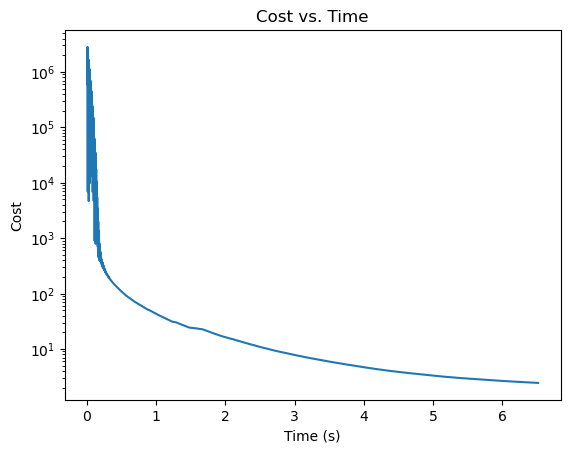

Iteration: 0, Loss: 601636.3345314569
Iteration: 400, Loss: 8.325112882159116
Iteration: 800, Loss: 0.10246945340178783
Iteration: 1200, Loss: 0.02020290411171457
Iteration: 1600, Loss: 0.018381185405375446
Iteration: 2000, Loss: 0.01827296982773583
Iteration: 2400, Loss: 0.018264694593154093
Iteration: 2800, Loss: 0.018264365319771058


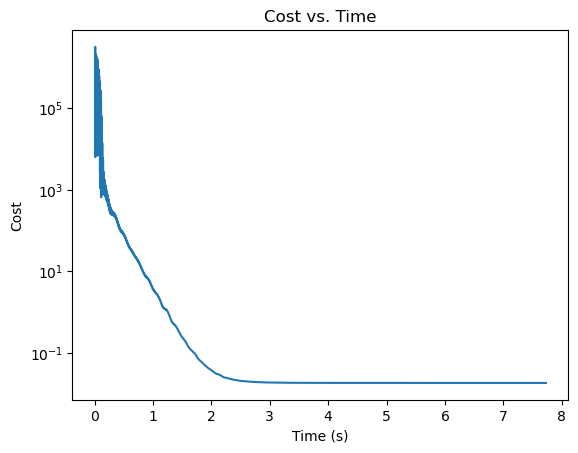

Iteration: 0, Loss: 601636.3617997253
Iteration: 400, Loss: 8.395467419222147
Iteration: 800, Loss: 0.17497409308620016
Iteration: 1200, Loss: 0.09311948649107861
Iteration: 1600, Loss: 0.0913959511093885
Iteration: 2000, Loss: 0.09131756794636361
Iteration: 2400, Loss: 0.09131866810122821
Iteration: 2800, Loss: 0.0913213293019037


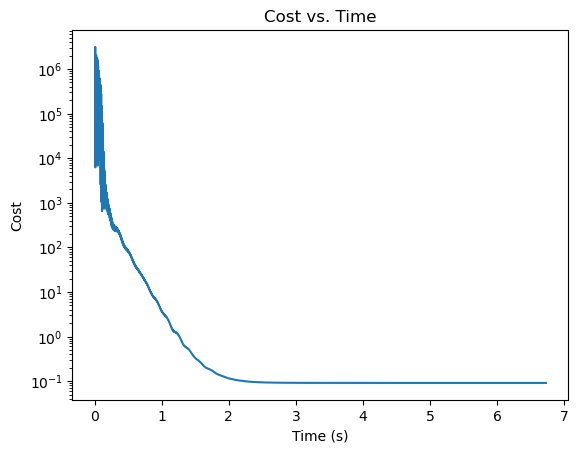

Iteration: 0, Loss: 601636.3958850609
Iteration: 400, Loss: 8.483410590550934
Iteration: 800, Loss: 0.26560489269171556
Iteration: 1200, Loss: 0.18426521446528366
Iteration: 1600, Loss: 0.1826644082394048
Iteration: 2000, Loss: 0.18262331559464834
Iteration: 2400, Loss: 0.18263613498632086
Iteration: 2800, Loss: 0.1826425342795695


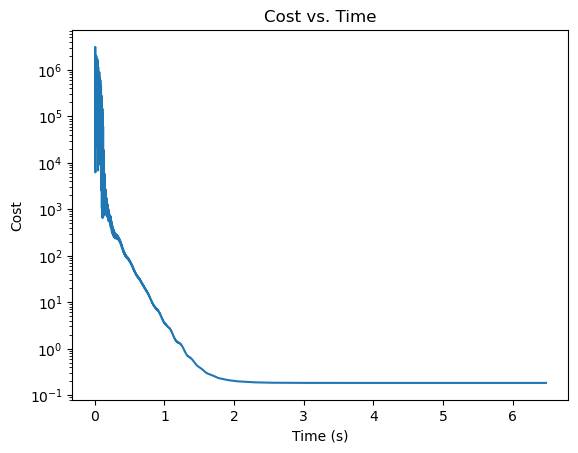

Iteration: 0, Loss: 601637.0094211012
Iteration: 400, Loss: 10.066387674469109
Iteration: 800, Loss: 1.8969592855909927
Iteration: 1200, Loss: 1.8248883180009747
Iteration: 1600, Loss: 1.8254966365796985
Iteration: 2000, Loss: 1.8261267732637734
Iteration: 2400, Loss: 1.8263505389179886
Iteration: 2800, Loss: 1.8264242238775539


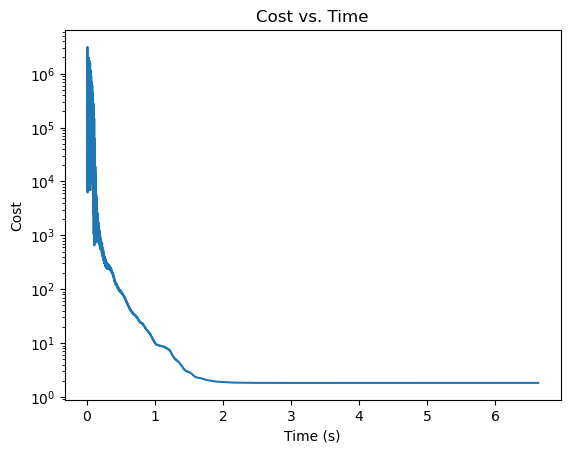

Iteration: 0, Loss: 5036307.970530282
Iteration: 400, Loss: 70.68276922937989
Iteration: 800, Loss: 24.3855981919443
Iteration: 1200, Loss: 11.723848856911696


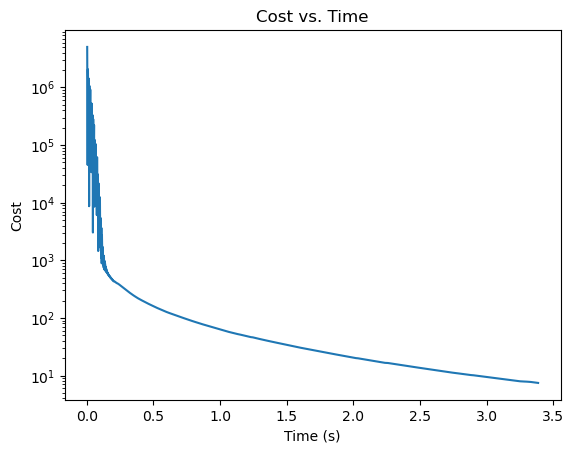

Iteration: 0, Loss: 5036308.046275472
Iteration: 400, Loss: 70.73075930998579
Iteration: 800, Loss: 24.44175987480629
Iteration: 1200, Loss: 11.784404364424761


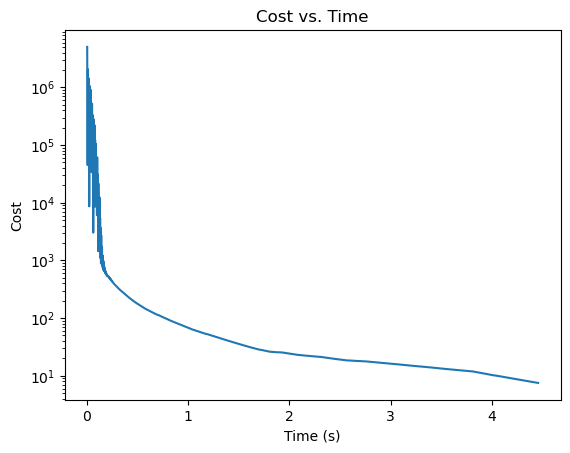

Iteration: 0, Loss: 5036308.14095696
Iteration: 400, Loss: 70.79074691074317
Iteration: 800, Loss: 24.51196197838378
Iteration: 1200, Loss: 11.860098748816092


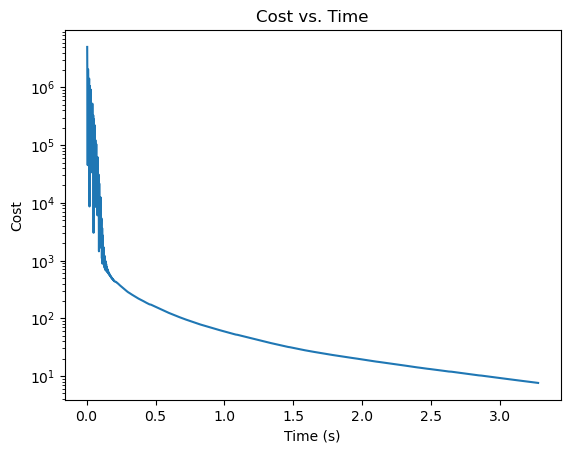

Iteration: 0, Loss: 5036309.845223738
Iteration: 400, Loss: 71.87052372437586
Iteration: 800, Loss: 25.775599842778583
Iteration: 1200, Loss: 13.22259766786004


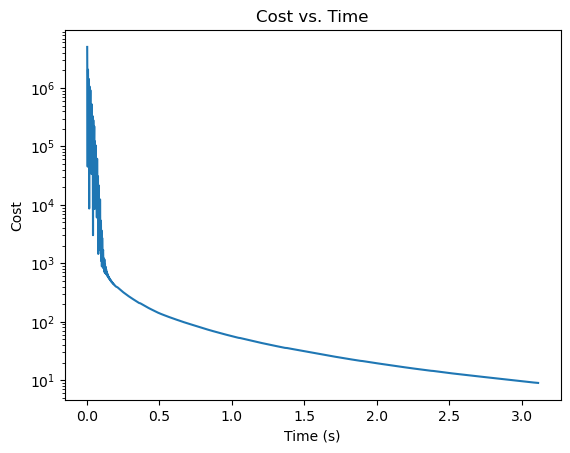

Iteration: 0, Loss: 5036307.970530282
Iteration: 400, Loss: 22.47239244620732
Iteration: 800, Loss: 6.01491346530107
Iteration: 1200, Loss: 2.2570023004523887


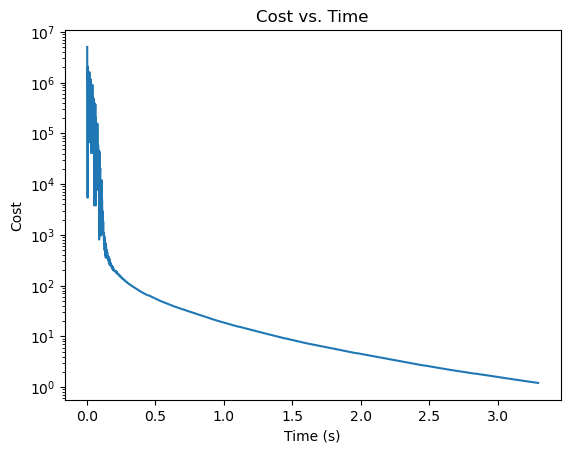

Iteration: 0, Loss: 5036308.046275472
Iteration: 400, Loss: 22.52926728938573
Iteration: 800, Loss: 6.078671247601843
Iteration: 1200, Loss: 2.324076760298573


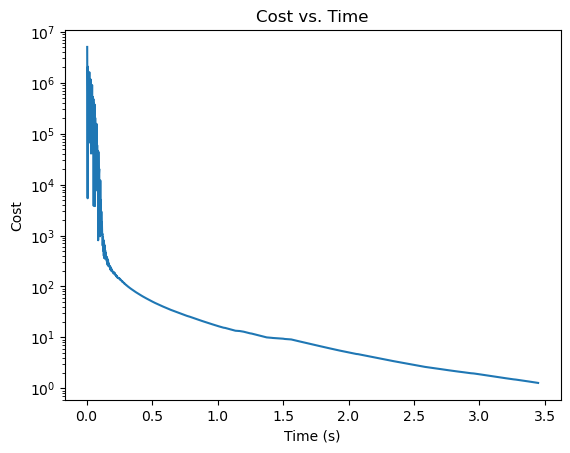

Iteration: 0, Loss: 5036308.14095696
Iteration: 400, Loss: 22.600360843358743
Iteration: 800, Loss: 6.1583684754778085
Iteration: 1200, Loss: 2.407919835106303


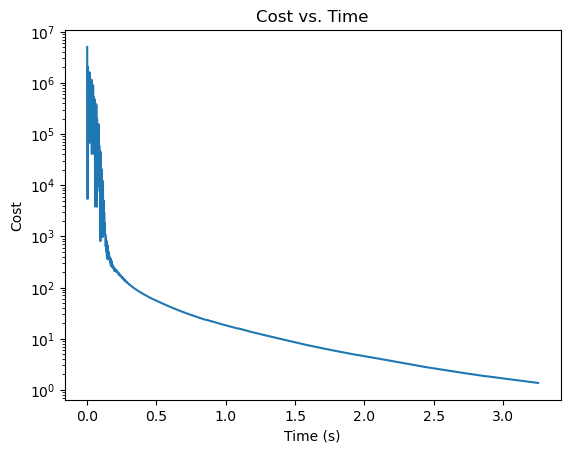

Iteration: 0, Loss: 5036309.845223738
Iteration: 400, Loss: 23.88004481487299
Iteration: 800, Loss: 7.592918577245211
Iteration: 1200, Loss: 3.9170951816454442


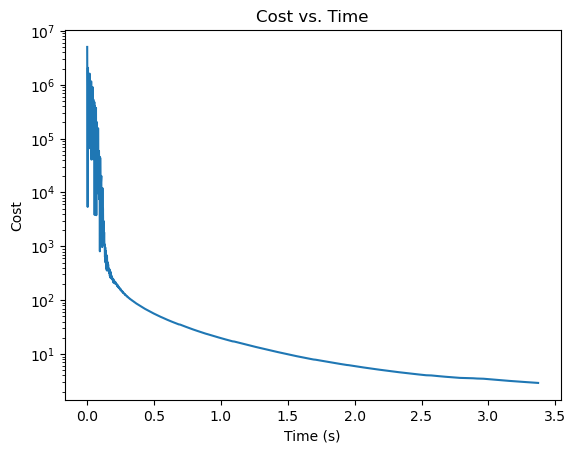

Iteration: 0, Loss: 5036307.970530282
Iteration: 400, Loss: 4.808139424476537
Iteration: 800, Loss: 0.032448758294341344
Iteration: 1200, Loss: 0.018309185419122985


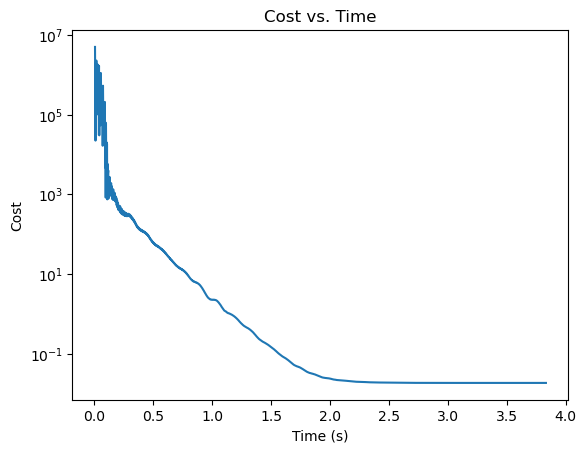

Iteration: 0, Loss: 5036308.046275472
Iteration: 400, Loss: 4.88014590968563
Iteration: 800, Loss: 0.10545624335866698
Iteration: 1200, Loss: 0.09136414720829053


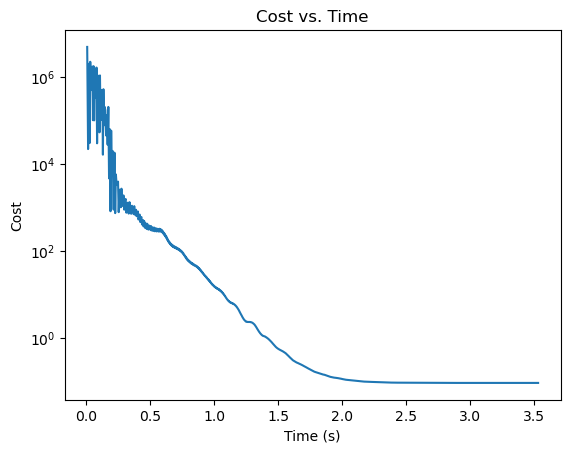

Iteration: 0, Loss: 5036308.14095696
Iteration: 400, Loss: 4.970154016196994
Iteration: 800, Loss: 0.196715599689074
Iteration: 1200, Loss: 0.18268284944474997


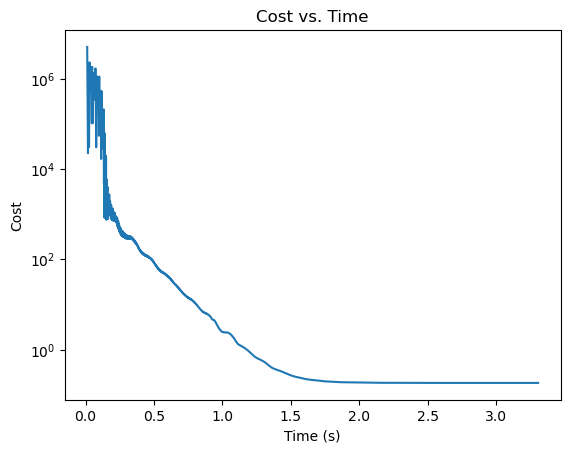

Iteration: 0, Loss: 5036309.845223738
Iteration: 400, Loss: 6.590299933401569
Iteration: 800, Loss: 1.8393840136364008
Iteration: 1200, Loss: 1.8264194897010197


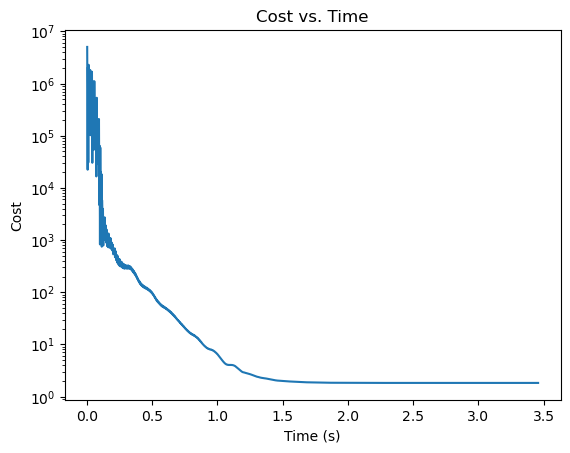

Iteration: 0, Loss: 5036307.970530282
Iteration: 400, Loss: 70.68276922937989
Iteration: 800, Loss: 24.3855981919443
Iteration: 1200, Loss: 11.723848856911696
Iteration: 1600, Loss: 6.451084716250108
Iteration: 2000, Loss: 3.8382815925635936
Iteration: 2400, Loss: 2.4099890020109394
Iteration: 2800, Loss: 1.5734223907890965


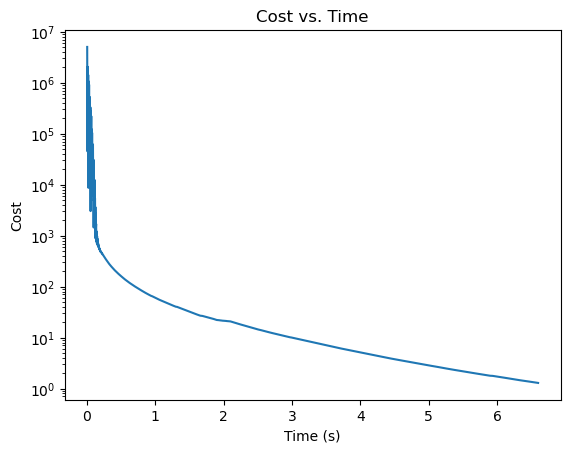

Iteration: 0, Loss: 5036308.046275472
Iteration: 400, Loss: 70.73075930998579
Iteration: 800, Loss: 24.44175987480629
Iteration: 1200, Loss: 11.784404364424761
Iteration: 1600, Loss: 6.514483334977418
Iteration: 2000, Loss: 3.9036710156080914
Iteration: 2400, Loss: 2.476845305684872
Iteration: 2800, Loss: 1.6413988663689911


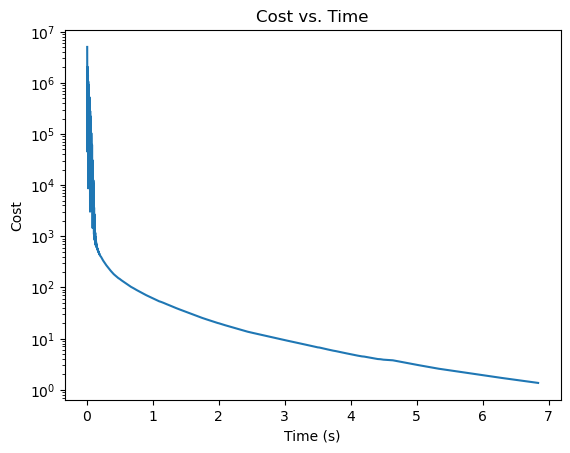

Iteration: 0, Loss: 5036308.14095696
Iteration: 400, Loss: 70.79074691074317
Iteration: 800, Loss: 24.51196197838378
Iteration: 1200, Loss: 11.860098748816092
Iteration: 1600, Loss: 6.593731608386554
Iteration: 2000, Loss: 3.9854077944137134
Iteration: 2400, Loss: 2.5604156852772877
Iteration: 2800, Loss: 1.7263694608438593


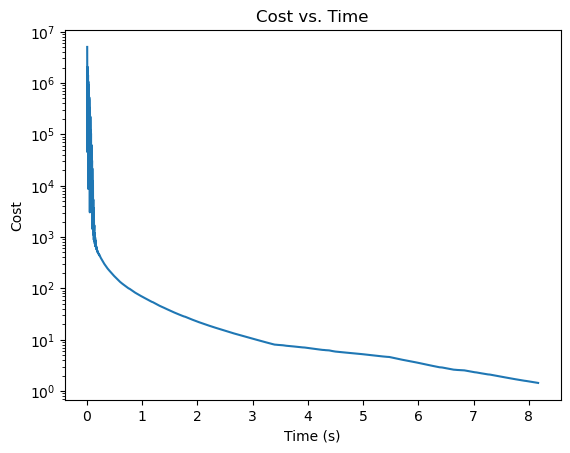

Iteration: 0, Loss: 5036309.845223738
Iteration: 400, Loss: 71.87052372437586
Iteration: 800, Loss: 25.775599842778583
Iteration: 1200, Loss: 13.22259766786004
Iteration: 1600, Loss: 8.02020052975101
Iteration: 2000, Loss: 5.456669812914911
Iteration: 2400, Loss: 4.064682517940773
Iteration: 2800, Loss: 3.255840161391486


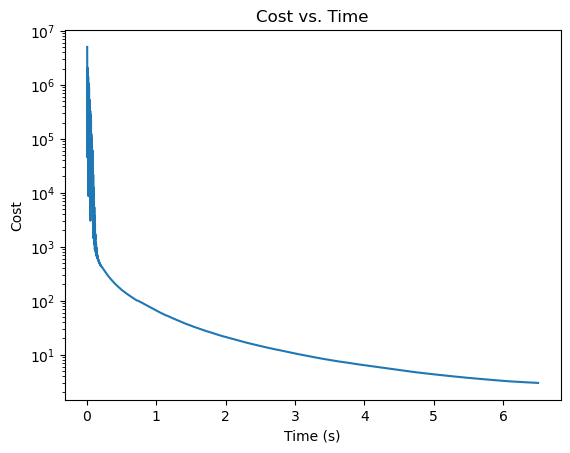

Iteration: 0, Loss: 5036307.970530282
Iteration: 400, Loss: 22.47239244620732
Iteration: 800, Loss: 6.01491346530107
Iteration: 1200, Loss: 2.2570023004523887
Iteration: 1600, Loss: 0.9971456553818178
Iteration: 2000, Loss: 0.4846948820595216
Iteration: 2400, Loss: 0.25368368172107797
Iteration: 2800, Loss: 0.14167555983941563


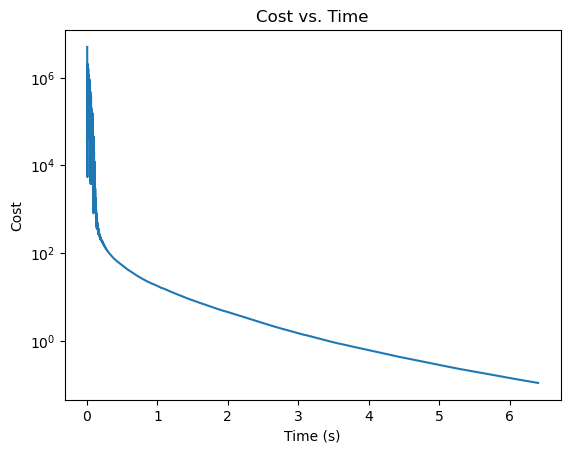

Iteration: 0, Loss: 5036308.046275472
Iteration: 400, Loss: 22.52926728938573
Iteration: 800, Loss: 6.078671247601843
Iteration: 1200, Loss: 2.324076760298573
Iteration: 1600, Loss: 1.0661347782844437
Iteration: 2000, Loss: 0.5549020626773833
Iteration: 2400, Loss: 0.32469405745121904
Iteration: 2800, Loss: 0.21323883412990213


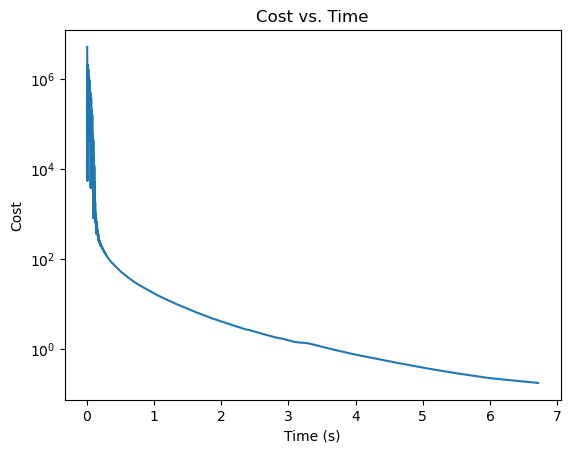

Iteration: 0, Loss: 5036308.14095696
Iteration: 400, Loss: 22.600360843358743
Iteration: 800, Loss: 6.1583684754778085
Iteration: 1200, Loss: 2.407919835106303
Iteration: 1600, Loss: 1.152371181912726
Iteration: 2000, Loss: 0.6426610384497103
Iteration: 2400, Loss: 0.4134570271138954
Iteration: 2800, Loss: 0.3026929269930103


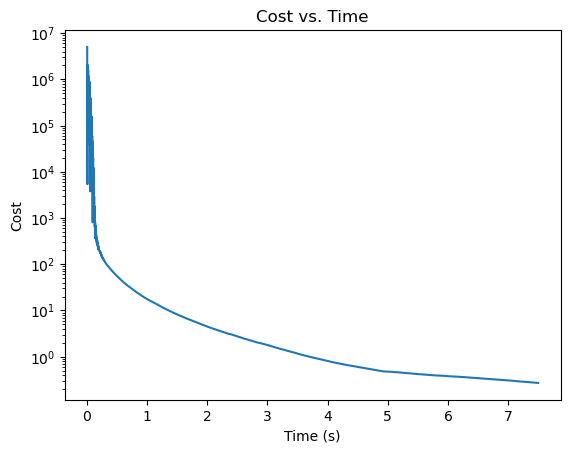

Iteration: 0, Loss: 5036309.845223738
Iteration: 400, Loss: 23.88004481487299
Iteration: 800, Loss: 7.592918577245211
Iteration: 1200, Loss: 3.9170951816454442
Iteration: 1600, Loss: 2.7046264472218096
Iteration: 2000, Loss: 2.222322602351597
Iteration: 2400, Loss: 2.01119048104207
Iteration: 2800, Loss: 1.9128665985289572


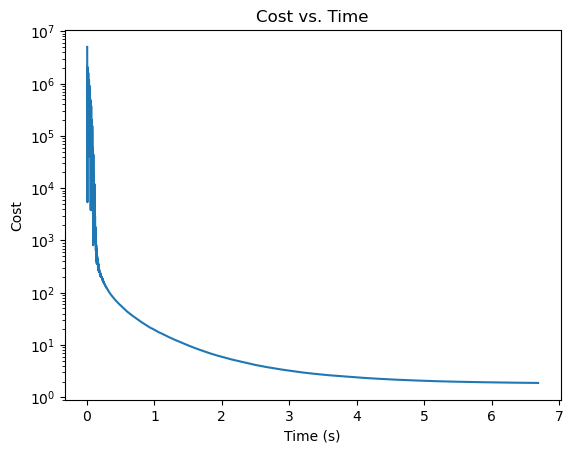

Iteration: 0, Loss: 5036307.970530282
Iteration: 400, Loss: 4.808139424476537
Iteration: 800, Loss: 0.032448758294341344
Iteration: 1200, Loss: 0.018309185419122985
Iteration: 1600, Loss: 0.01826469521422942
Iteration: 2000, Loss: 0.018264595634363164
Iteration: 2400, Loss: 0.018264597361943143


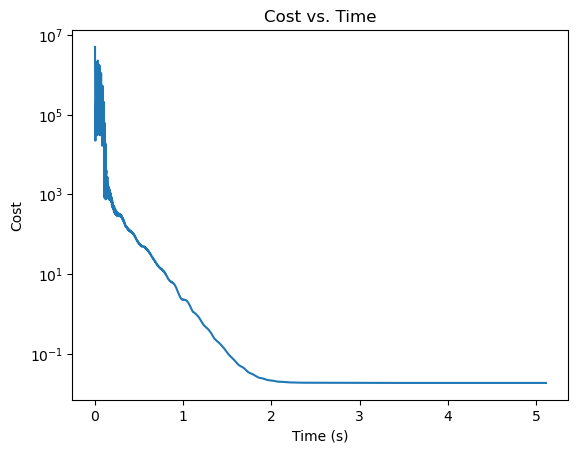

Iteration: 0, Loss: 5036308.046275472
Iteration: 400, Loss: 4.88014590968563
Iteration: 800, Loss: 0.10545624335866698
Iteration: 1200, Loss: 0.09136414720829053
Iteration: 1600, Loss: 0.09132294266826675
Iteration: 2000, Loss: 0.09132297643407332
Iteration: 2400, Loss: 0.09132298680449691


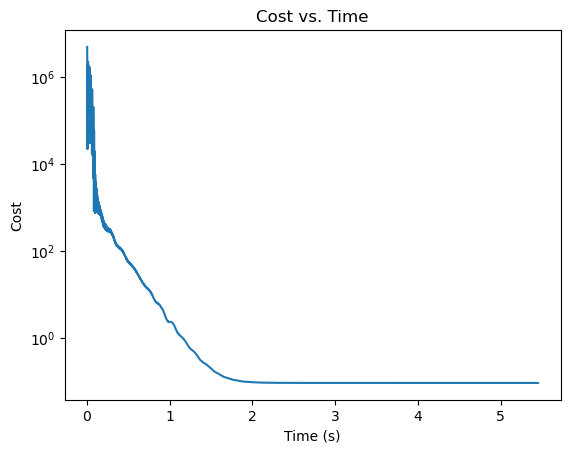

Iteration: 0, Loss: 5036308.14095696
Iteration: 400, Loss: 4.970154016196994
Iteration: 800, Loss: 0.196715599689074
Iteration: 1200, Loss: 0.18268284944474997
Iteration: 1600, Loss: 0.18264575198581343
Iteration: 2000, Loss: 0.18264595243371104
Iteration: 2400, Loss: 0.1826459736076891


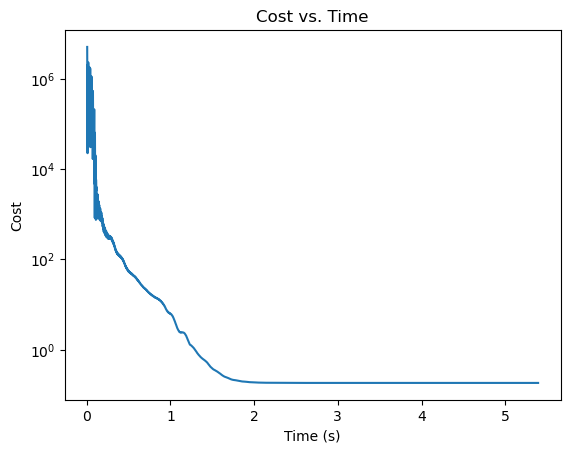

Iteration: 0, Loss: 5036309.845223738
Iteration: 400, Loss: 6.590299933401569
Iteration: 800, Loss: 1.8393840136364008
Iteration: 1200, Loss: 1.8264194897010197
Iteration: 1600, Loss: 1.8264563197016537
Iteration: 2000, Loss: 1.8264595204271898
Iteration: 2400, Loss: 1.826459736065149


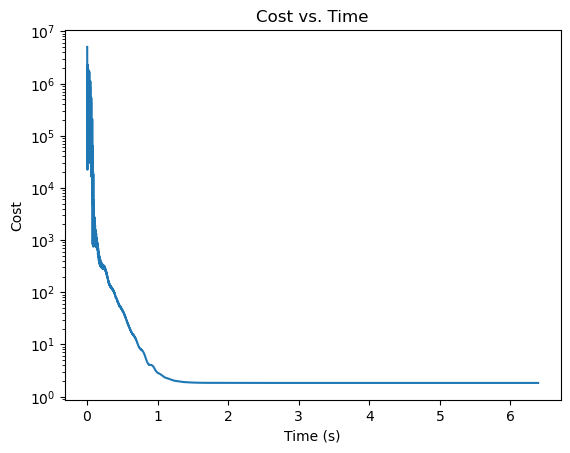

Iteration: 0, Loss: 19799719.009645972


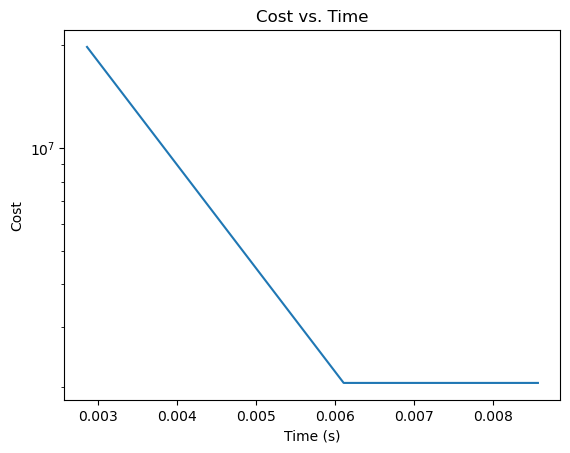

Iteration: 0, Loss: 19799719.20355366


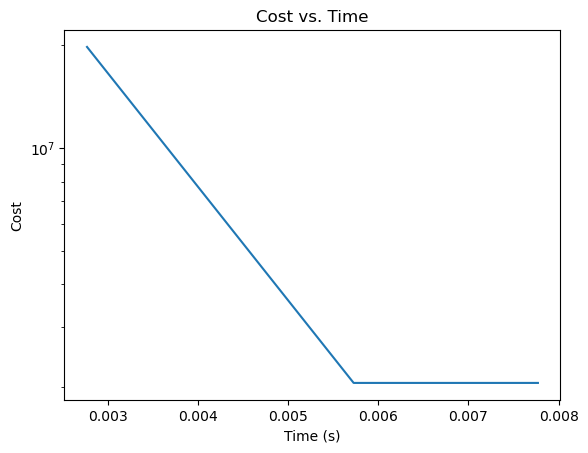

Iteration: 0, Loss: 19799719.44593827


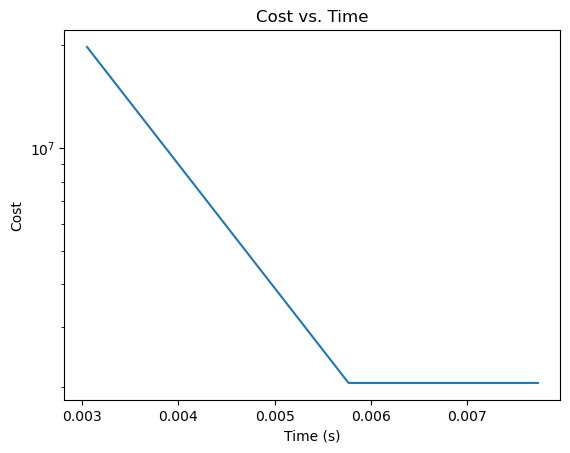

Iteration: 0, Loss: 19799723.80886122


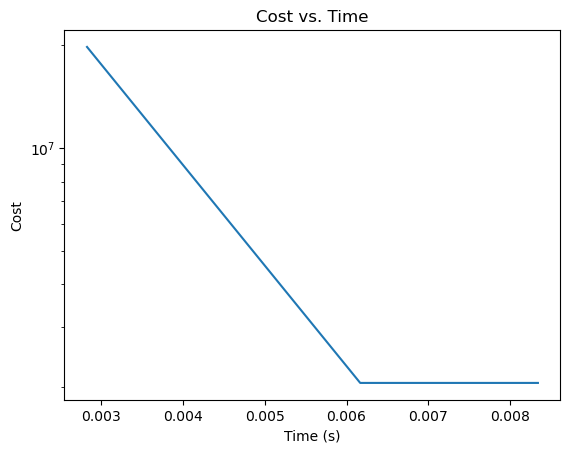

Iteration: 0, Loss: 19799719.009645972


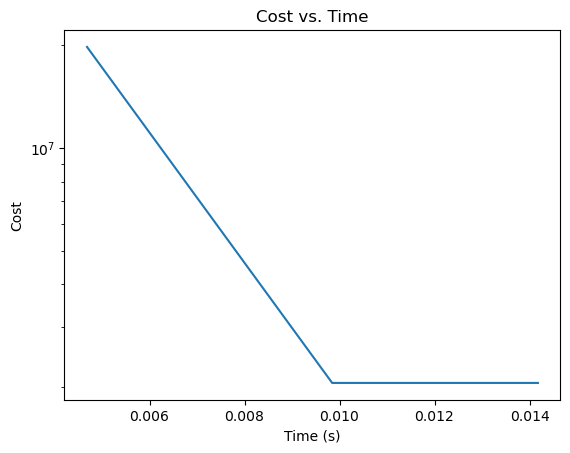

Iteration: 0, Loss: 19799719.20355366


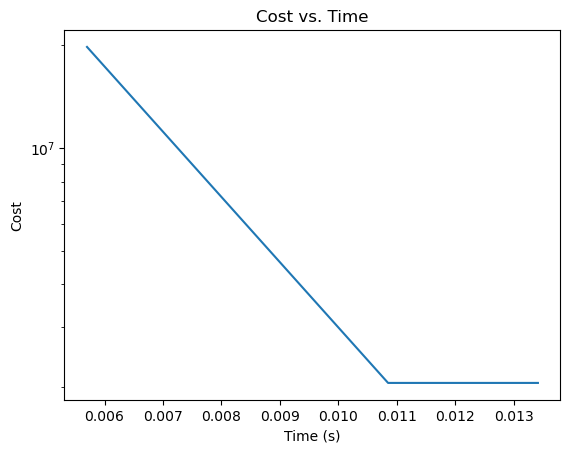

Iteration: 0, Loss: 19799719.44593827


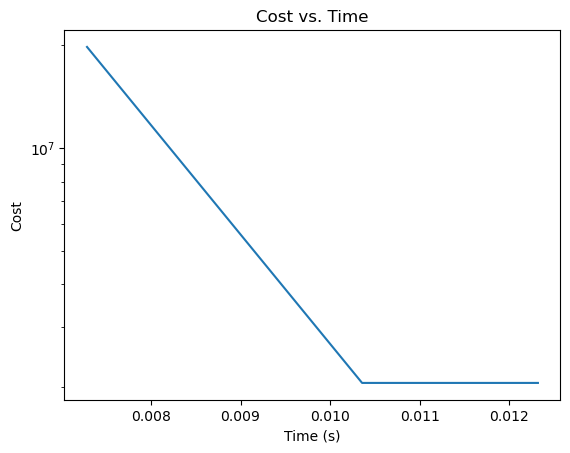

Iteration: 0, Loss: 19799723.80886122


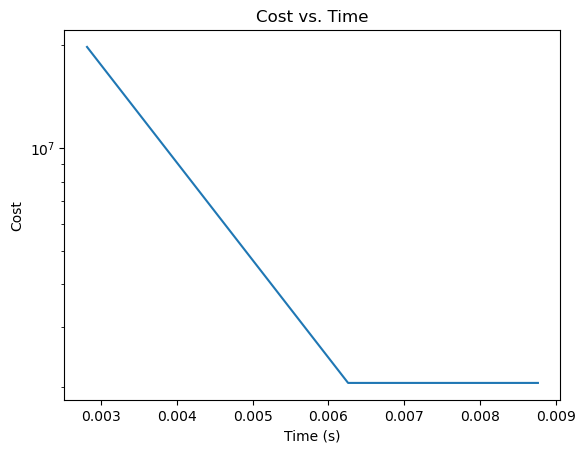

Iteration: 0, Loss: 19799719.009645972


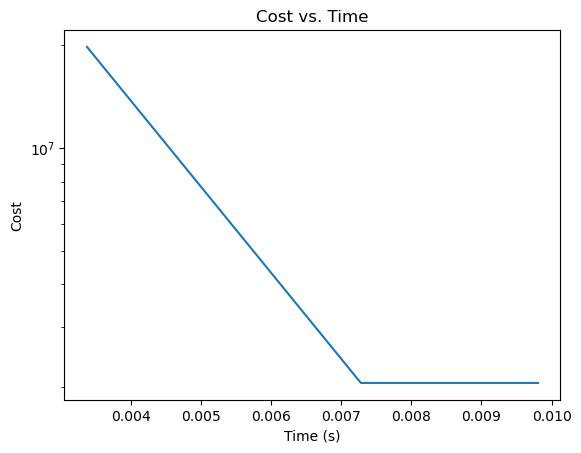

Iteration: 0, Loss: 19799719.20355366


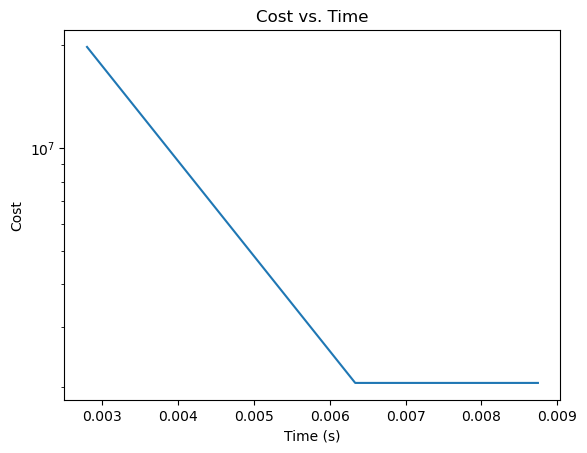

Iteration: 0, Loss: 19799719.44593827


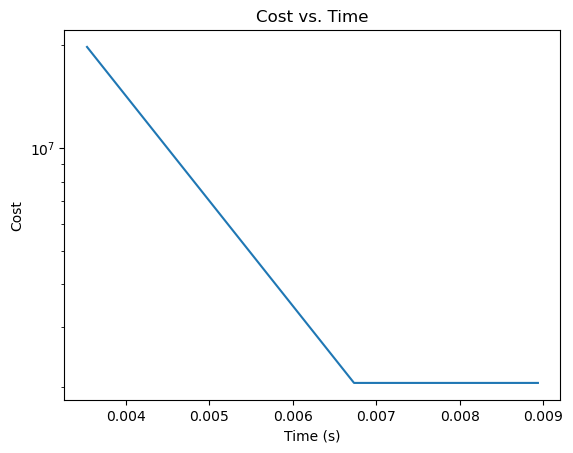

Iteration: 0, Loss: 19799723.80886122


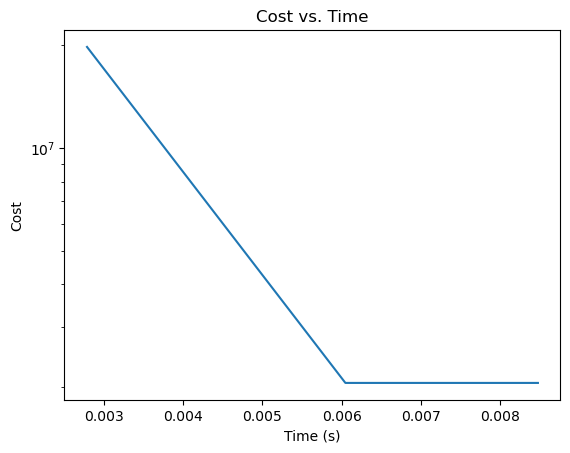

Iteration: 0, Loss: 19799719.009645972


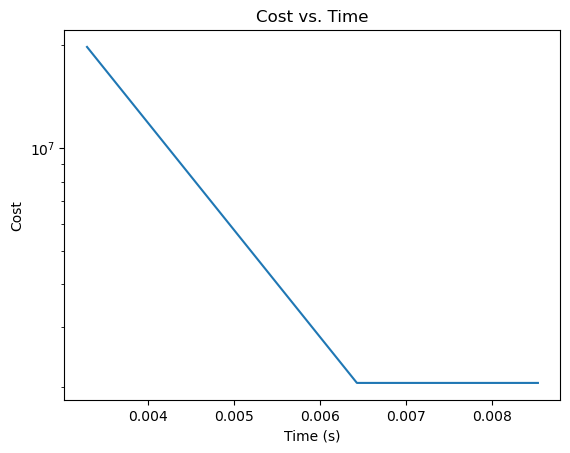

Iteration: 0, Loss: 19799719.20355366


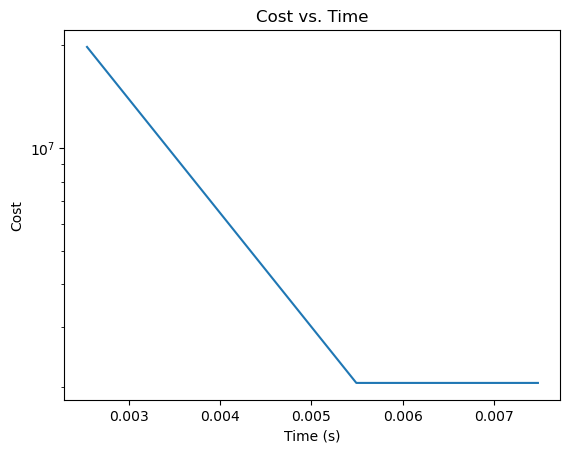

Iteration: 0, Loss: 19799719.44593827


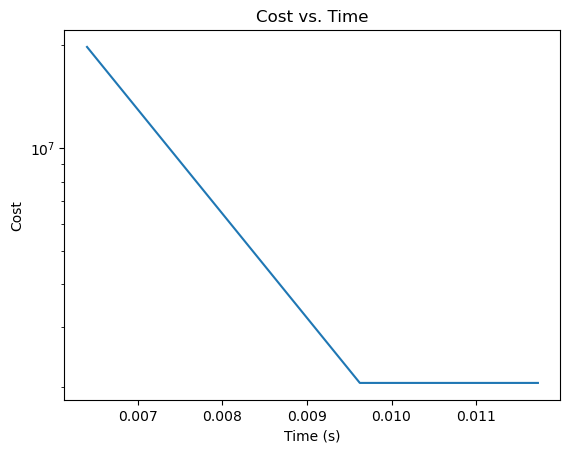

Iteration: 0, Loss: 19799723.80886122


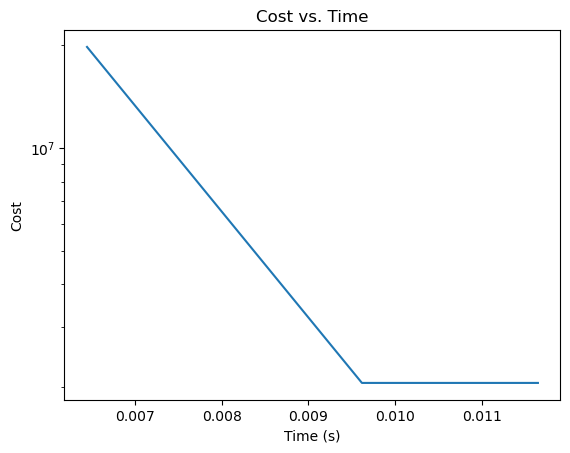

Iteration: 0, Loss: 19799719.009645972


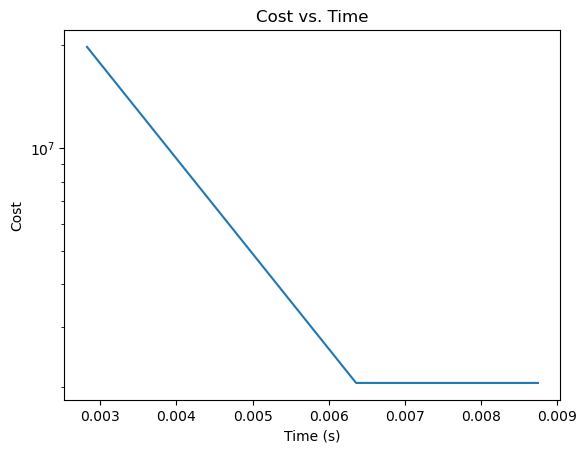

Iteration: 0, Loss: 19799719.20355366


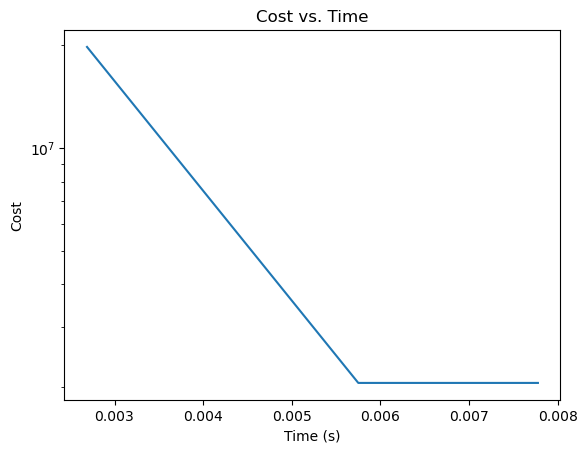

Iteration: 0, Loss: 19799719.44593827


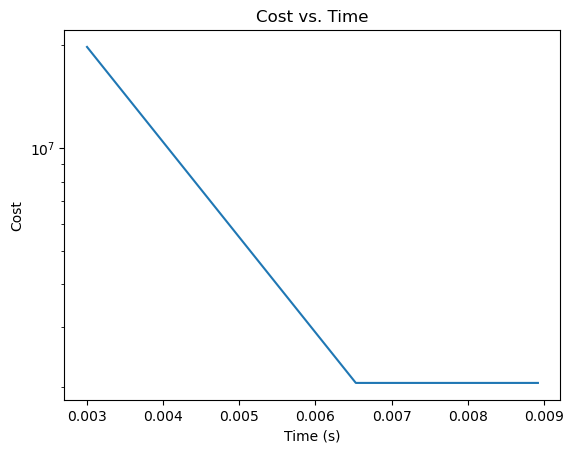

Iteration: 0, Loss: 19799723.80886122


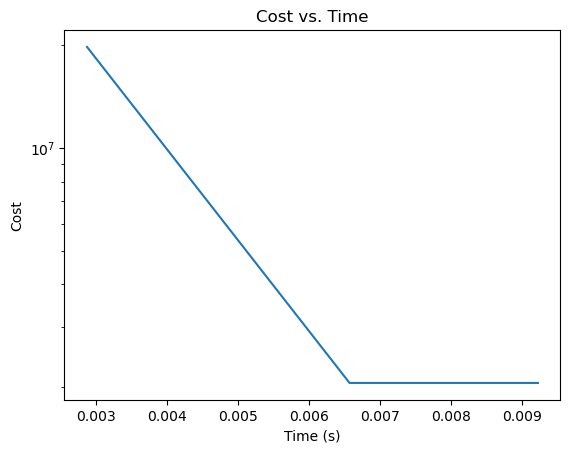

Iteration: 0, Loss: 19799719.009645972


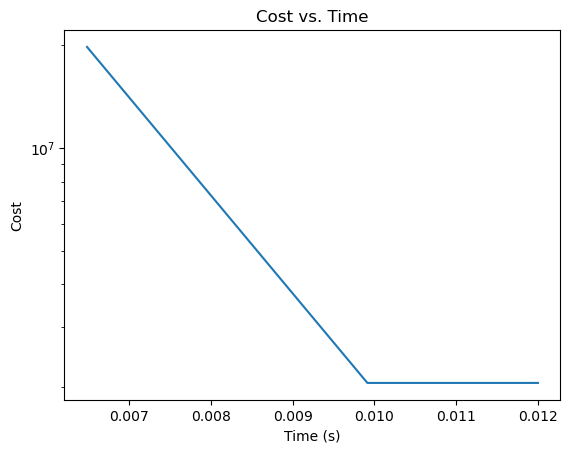

Iteration: 0, Loss: 19799719.20355366


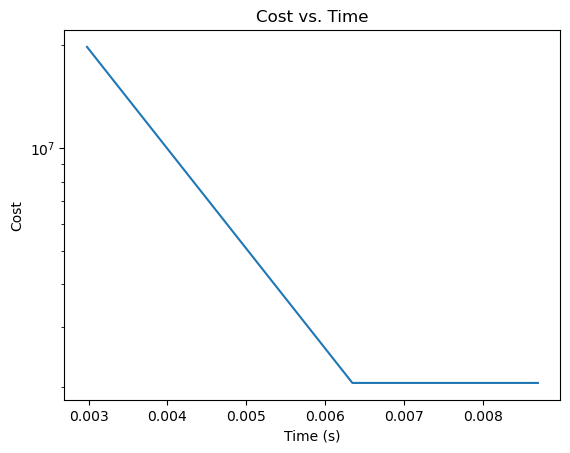

Iteration: 0, Loss: 19799719.44593827


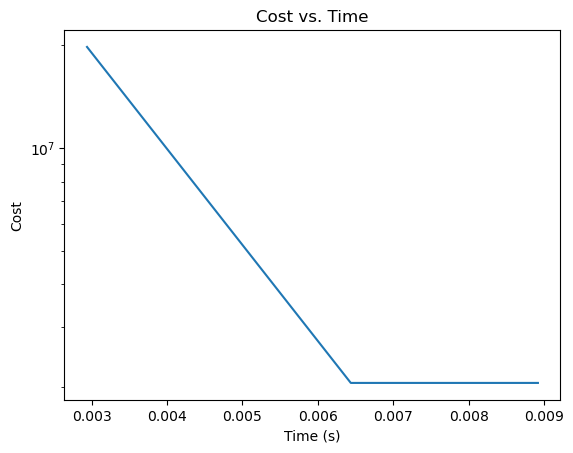

Iteration: 0, Loss: 19799723.80886122


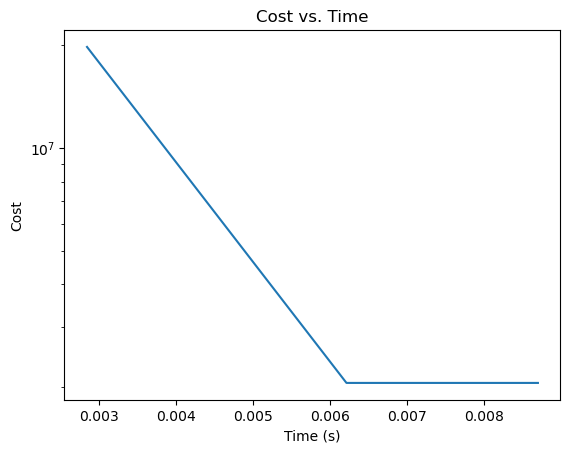

Iteration: 0, Loss: 35049595.425801404


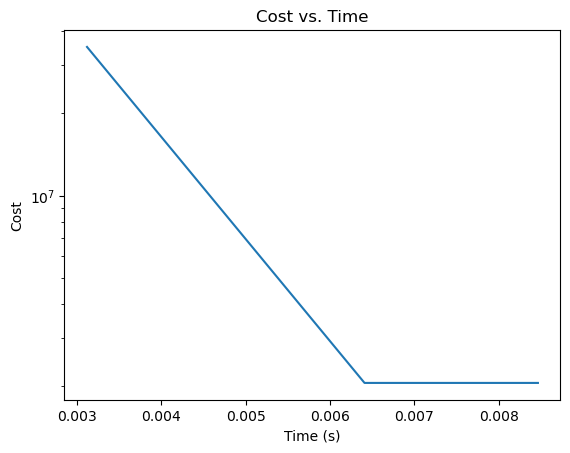

Iteration: 0, Loss: 35049595.72878217


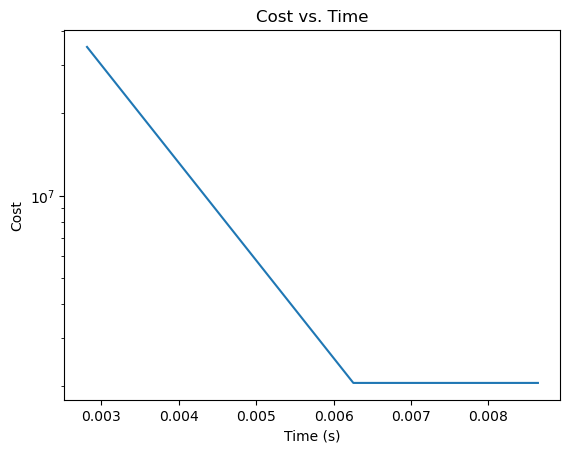

Iteration: 0, Loss: 35049596.107508115


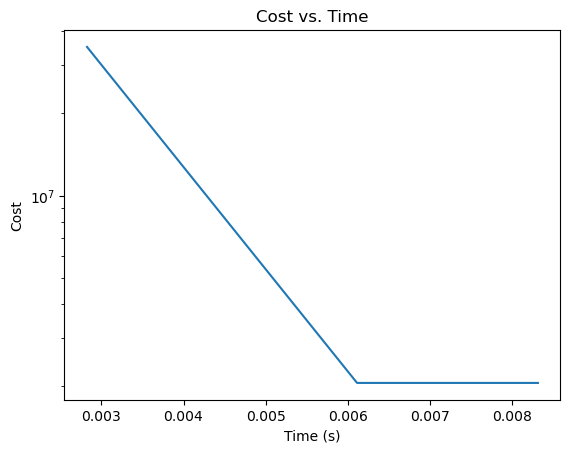

Iteration: 0, Loss: 35049602.92457523


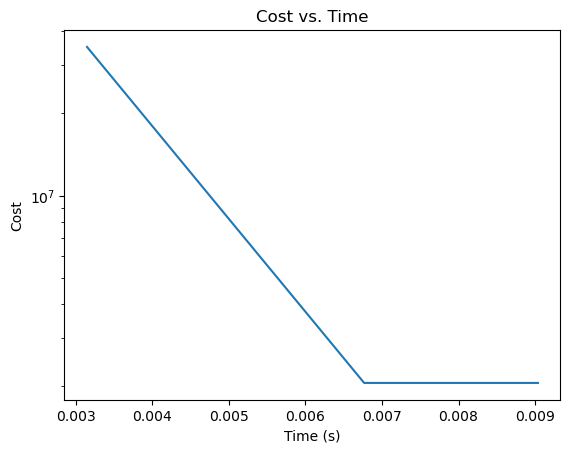

Iteration: 0, Loss: 35049595.425801404


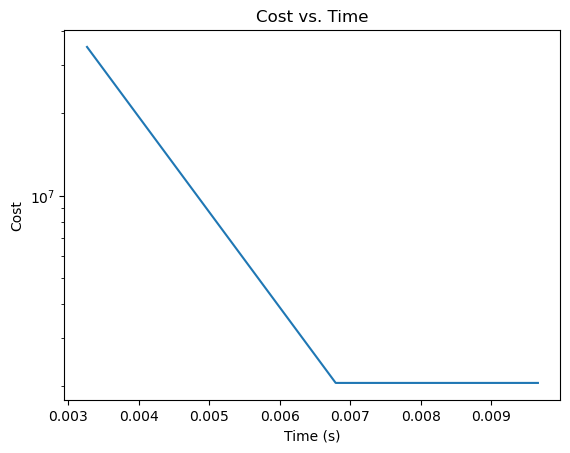

Iteration: 0, Loss: 35049595.72878217


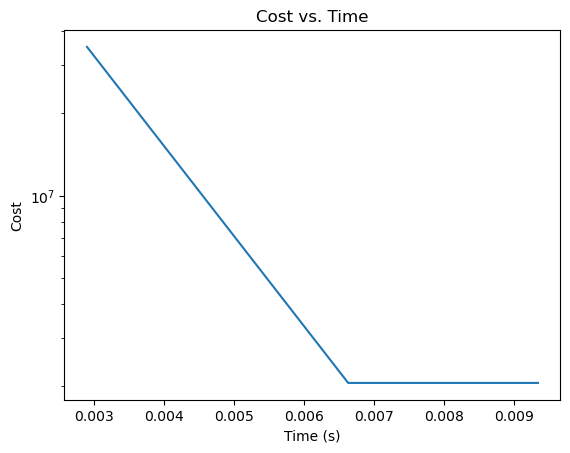

Iteration: 0, Loss: 35049596.107508115


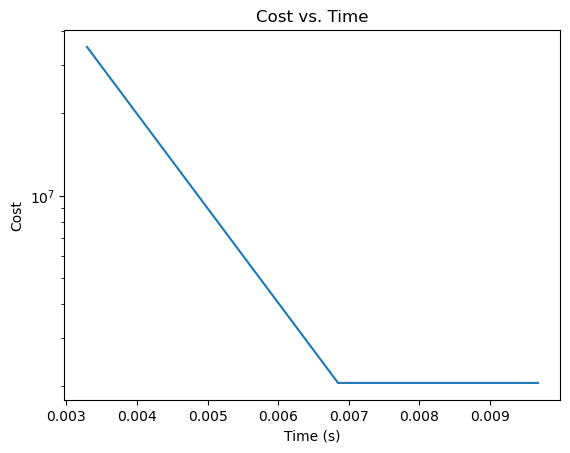

Iteration: 0, Loss: 35049602.92457523


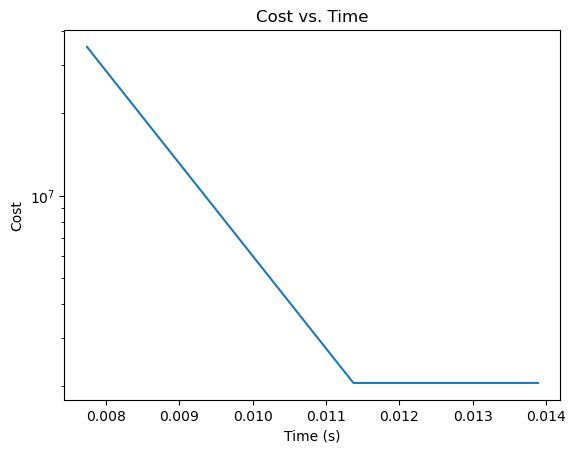

Iteration: 0, Loss: 35049595.425801404


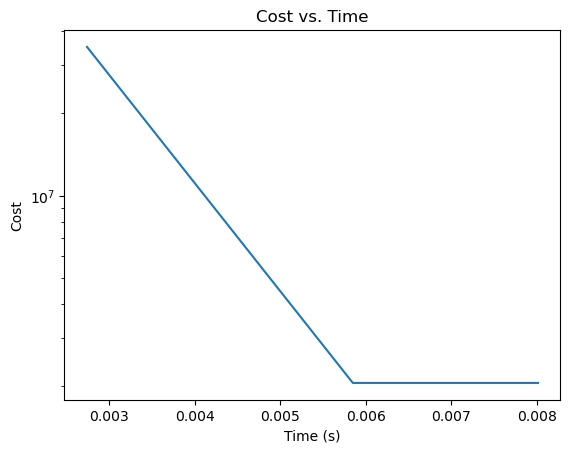

Iteration: 0, Loss: 35049595.72878217


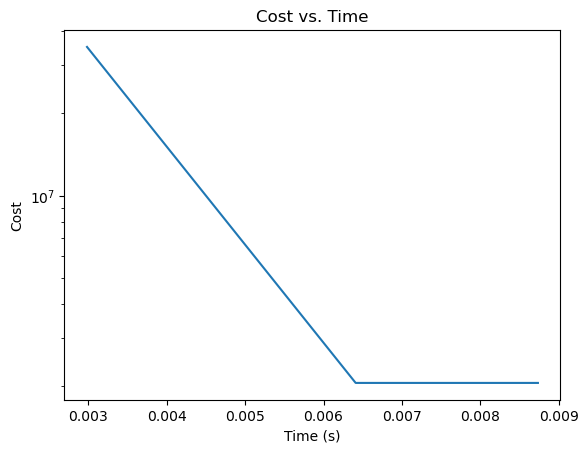

Iteration: 0, Loss: 35049596.107508115


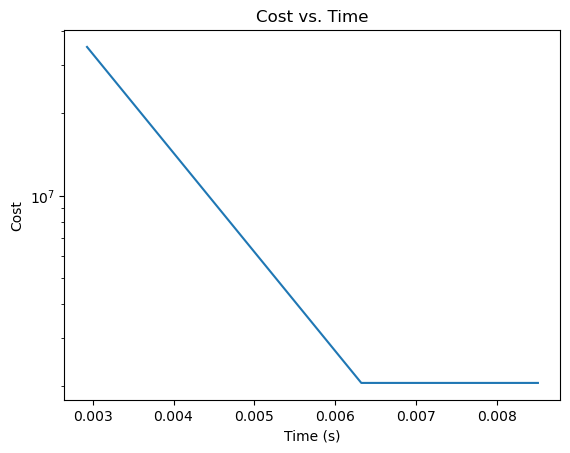

Iteration: 0, Loss: 35049602.92457523


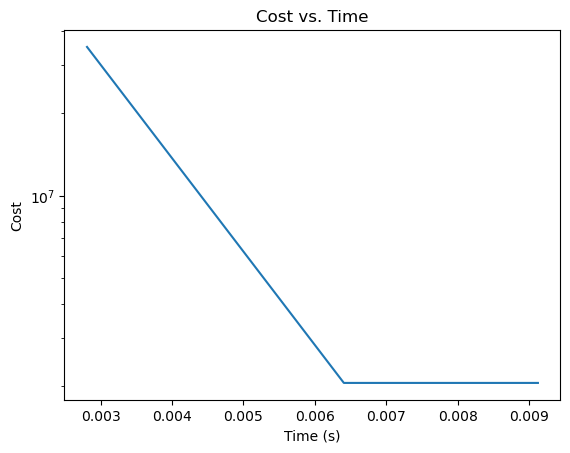

Iteration: 0, Loss: 35049595.425801404


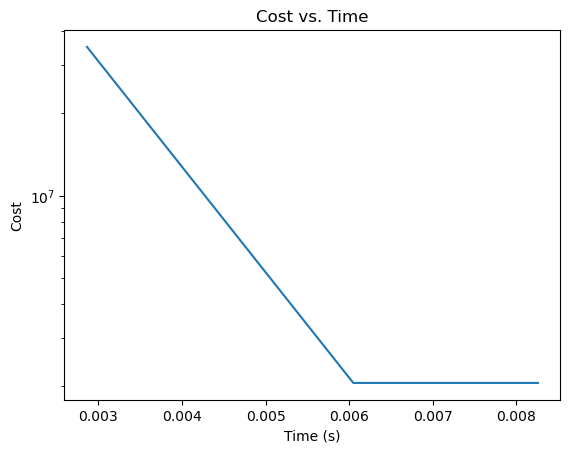

Iteration: 0, Loss: 35049595.72878217


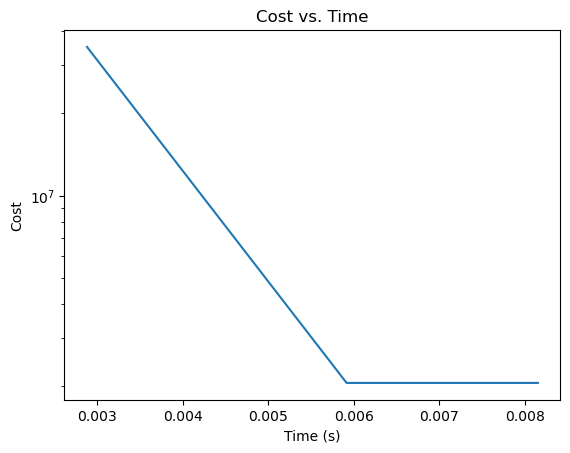

Iteration: 0, Loss: 35049596.107508115


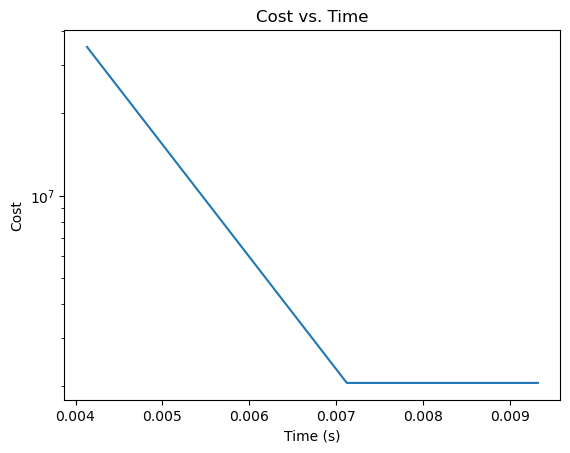

Iteration: 0, Loss: 35049602.92457523


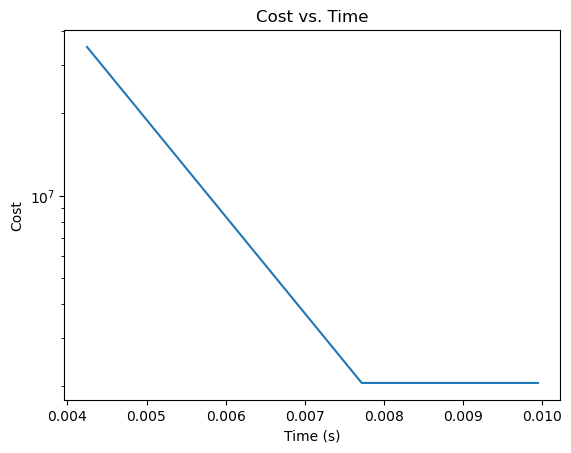

Iteration: 0, Loss: 35049595.425801404


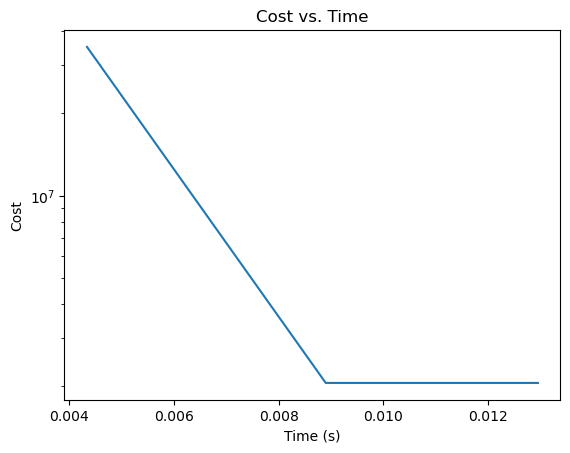

Iteration: 0, Loss: 35049595.72878217


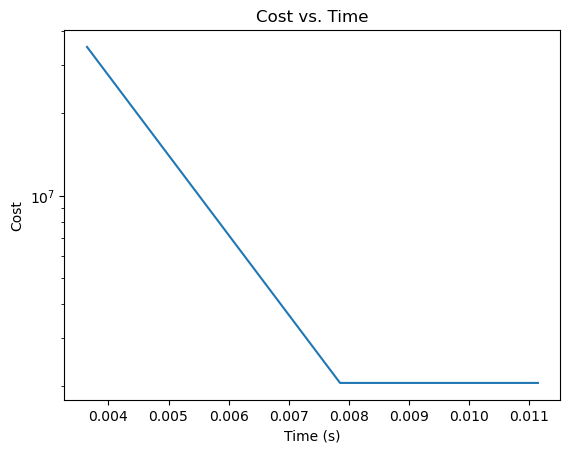

Iteration: 0, Loss: 35049596.107508115


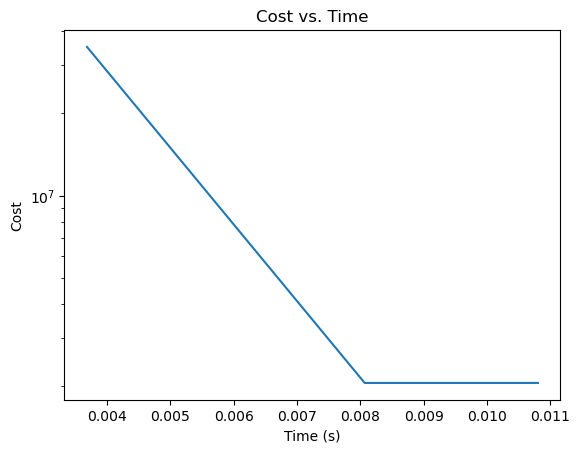

Iteration: 0, Loss: 35049602.92457523


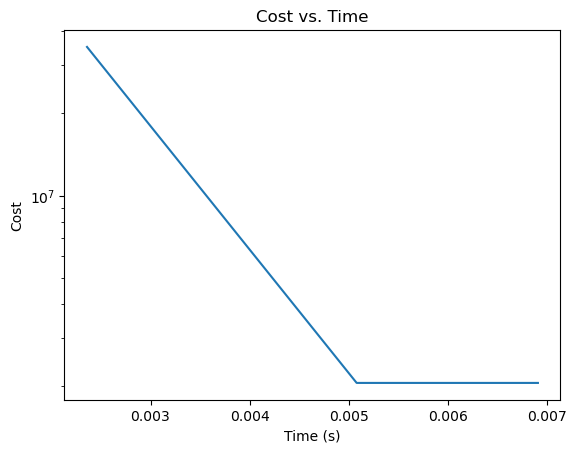

Iteration: 0, Loss: 35049595.425801404


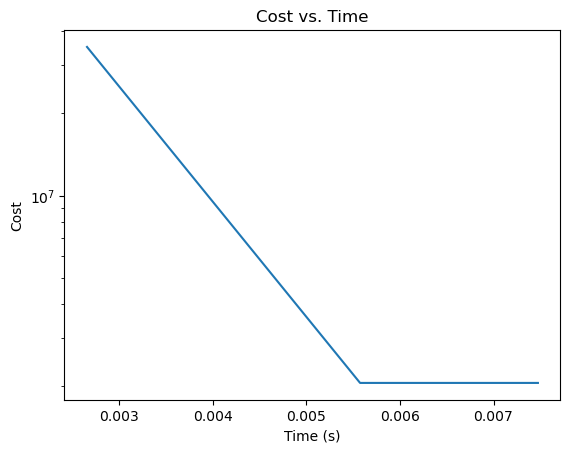

Iteration: 0, Loss: 35049595.72878217


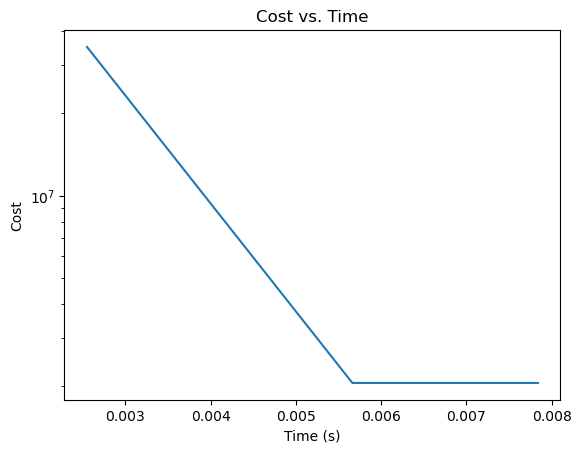

Iteration: 0, Loss: 35049596.107508115


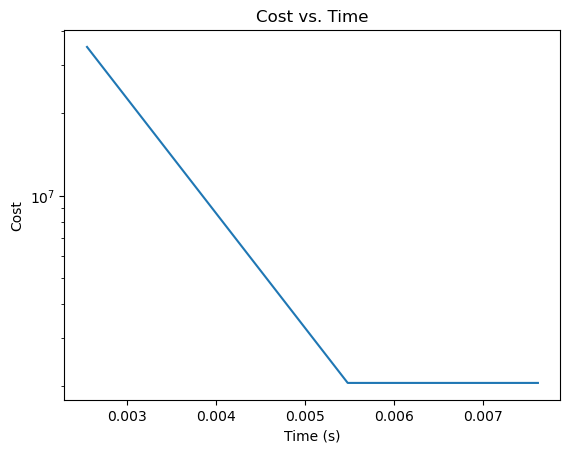

Iteration: 0, Loss: 35049602.92457523


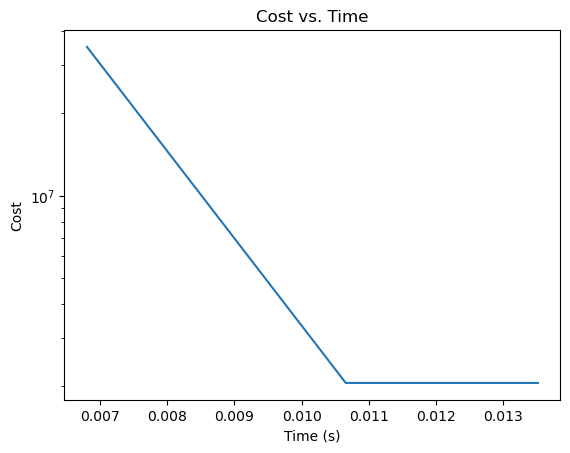

Iteration: 0, Loss: 3294226874.590703


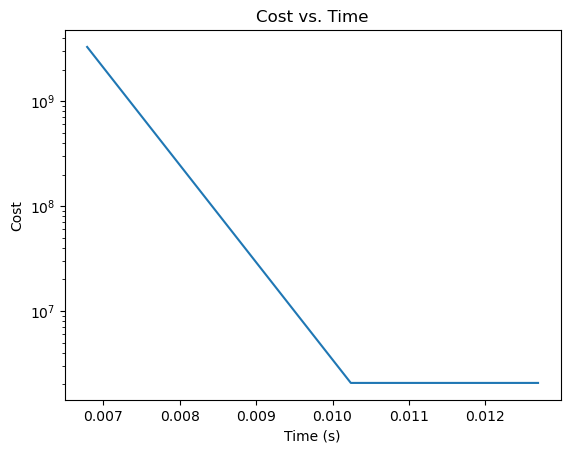

Iteration: 0, Loss: 3294226893.981472


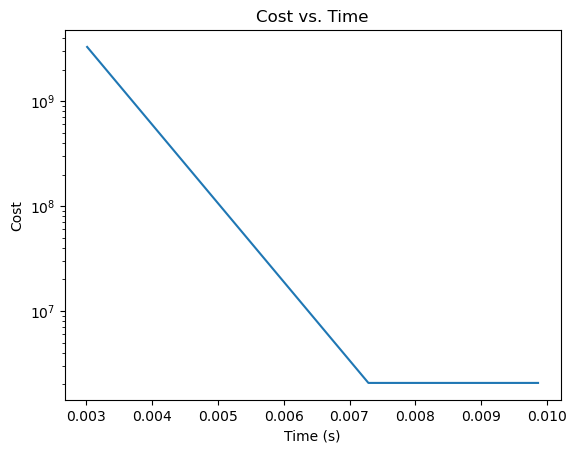

Iteration: 0, Loss: 3294226918.219933


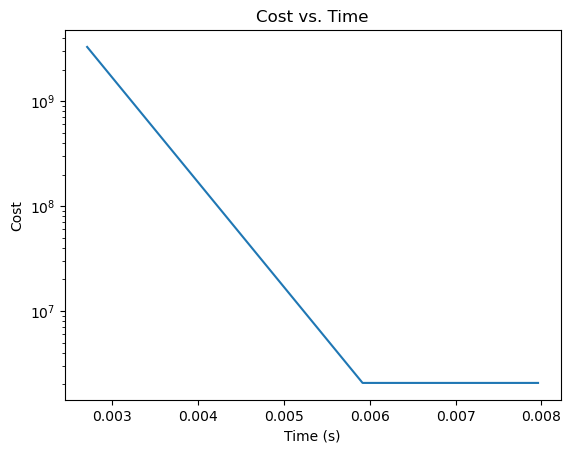

Iteration: 0, Loss: 3294227354.512228


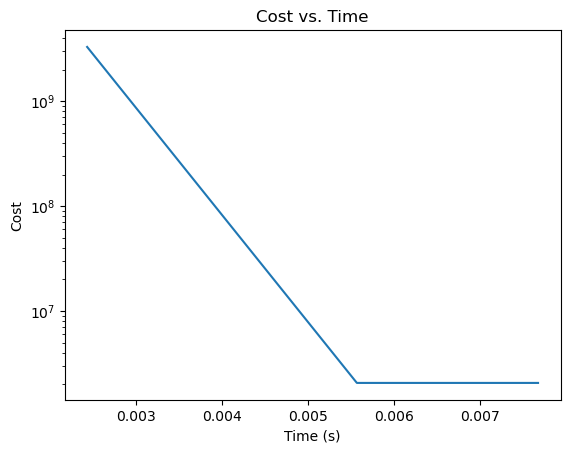

Iteration: 0, Loss: 3294226874.590703


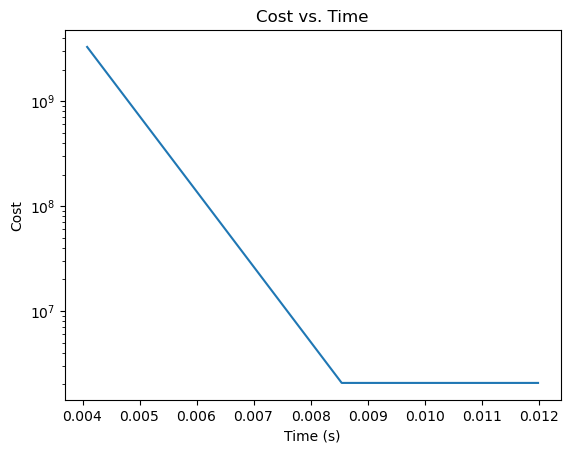

Iteration: 0, Loss: 3294226893.981472


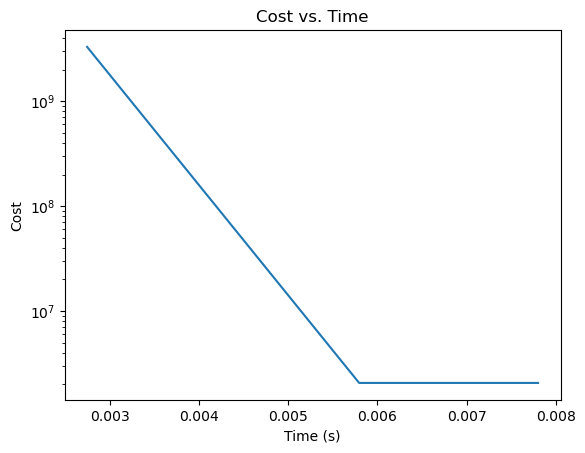

Iteration: 0, Loss: 3294226918.219933


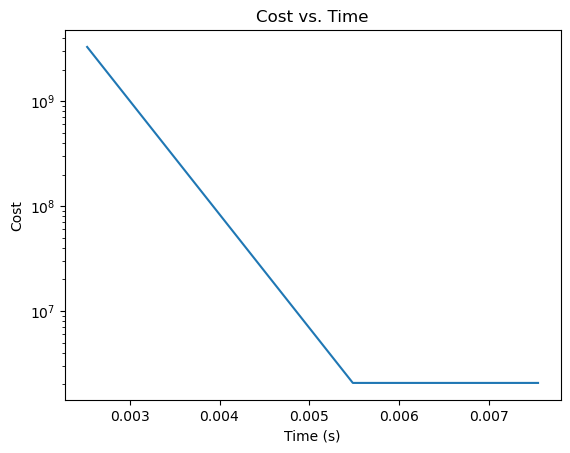

Iteration: 0, Loss: 3294227354.512228


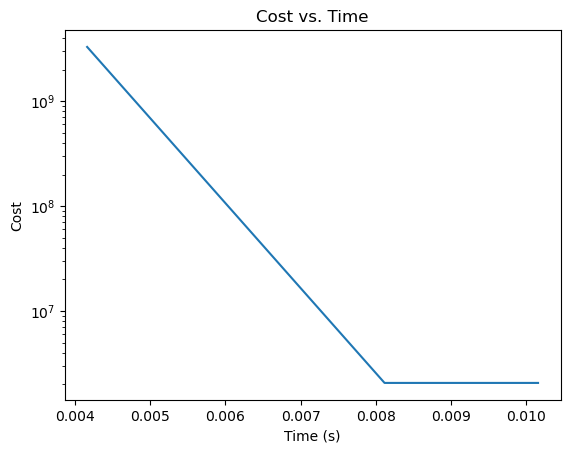

Iteration: 0, Loss: 3294226874.590703


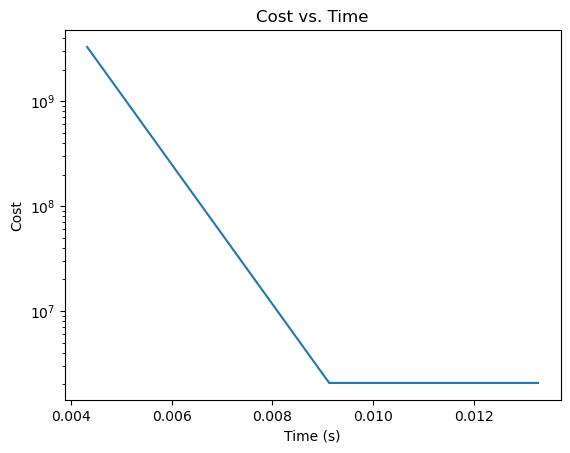

Iteration: 0, Loss: 3294226893.981472


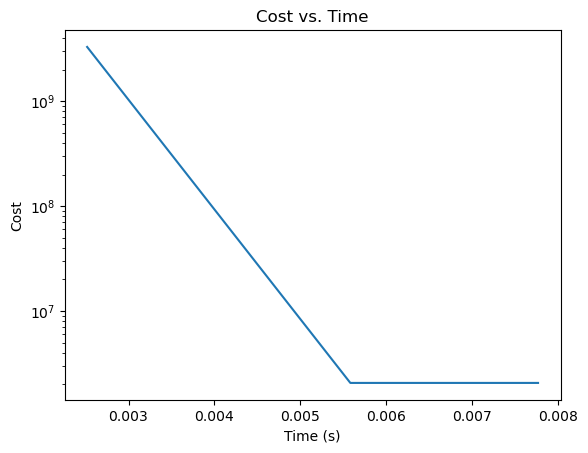

Iteration: 0, Loss: 3294226918.219933


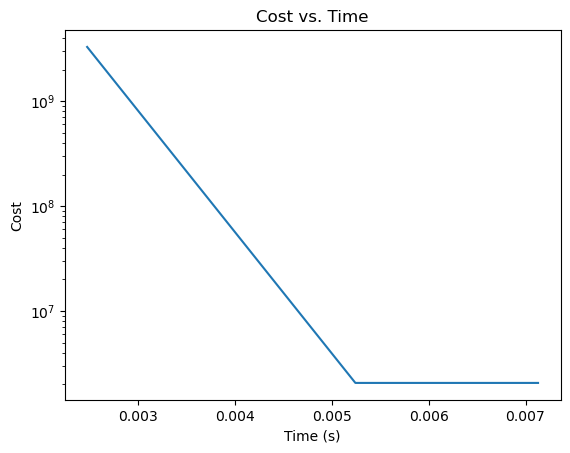

Iteration: 0, Loss: 3294227354.512228


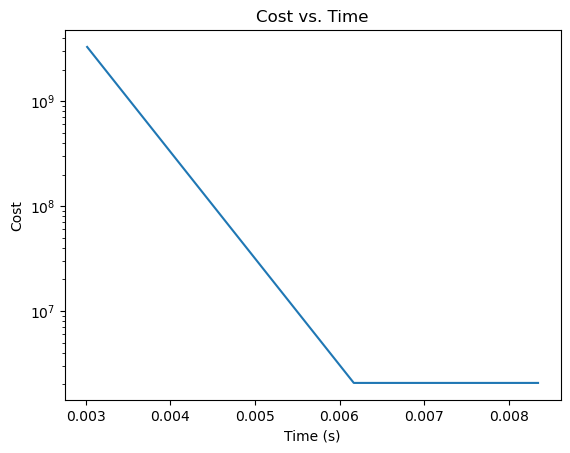

Iteration: 0, Loss: 3294226874.590703


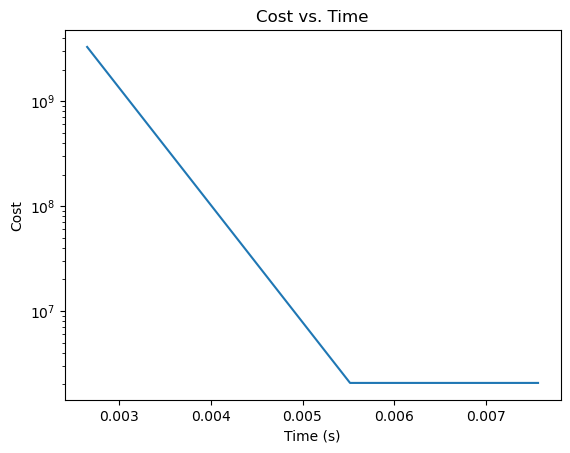

Iteration: 0, Loss: 3294226893.981472


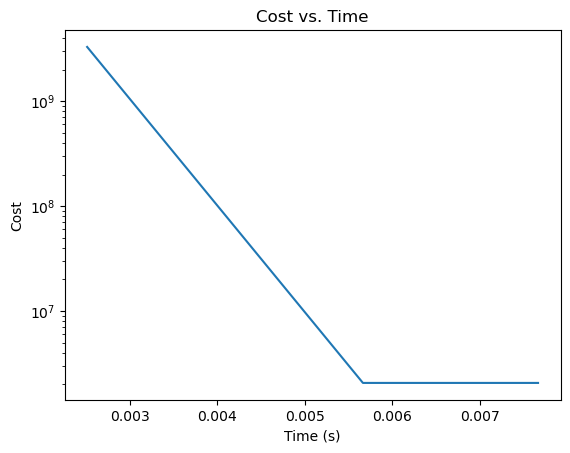

Iteration: 0, Loss: 3294226918.219933


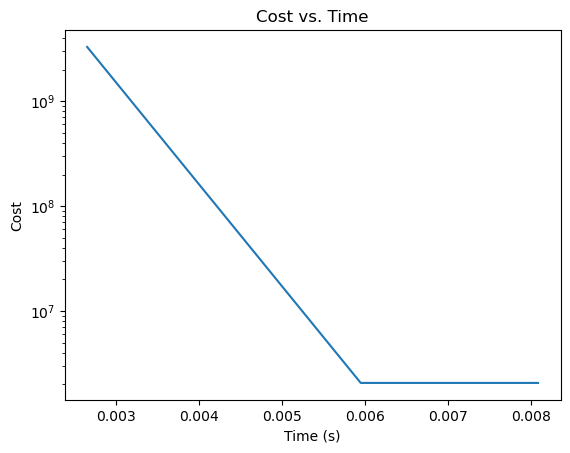

Iteration: 0, Loss: 3294227354.512228


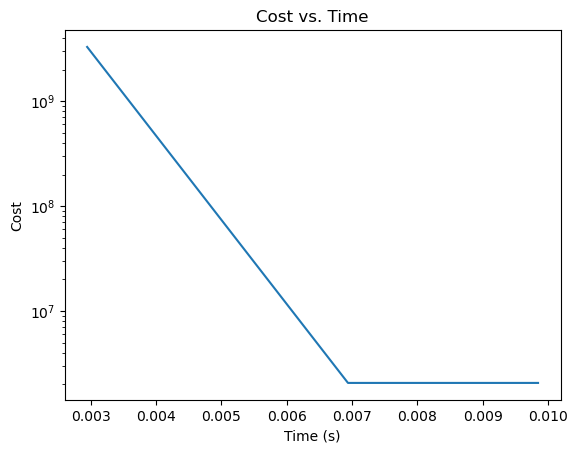

Iteration: 0, Loss: 3294226874.590703


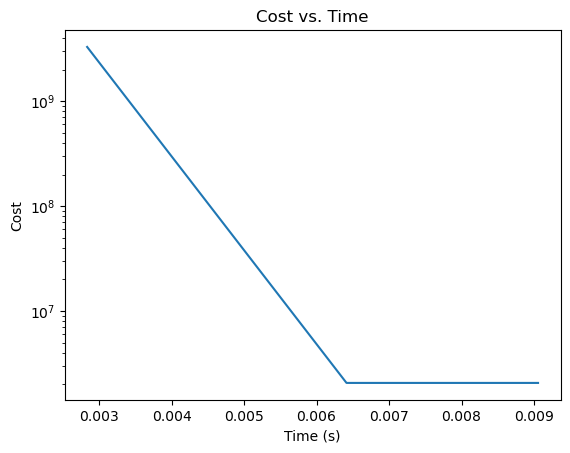

Iteration: 0, Loss: 3294226893.981472


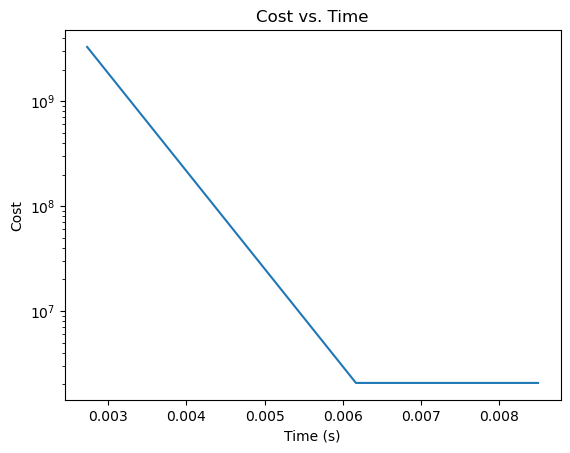

Iteration: 0, Loss: 3294226918.219933


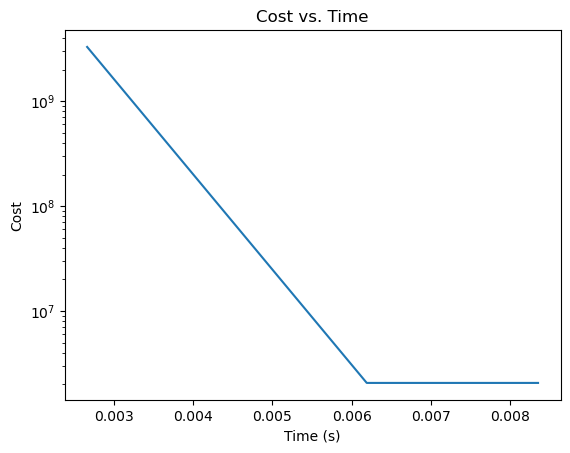

Iteration: 0, Loss: 3294227354.512228


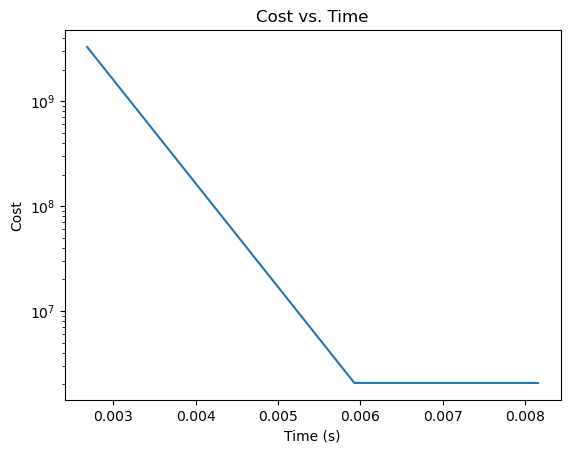

Iteration: 0, Loss: 3294226874.590703


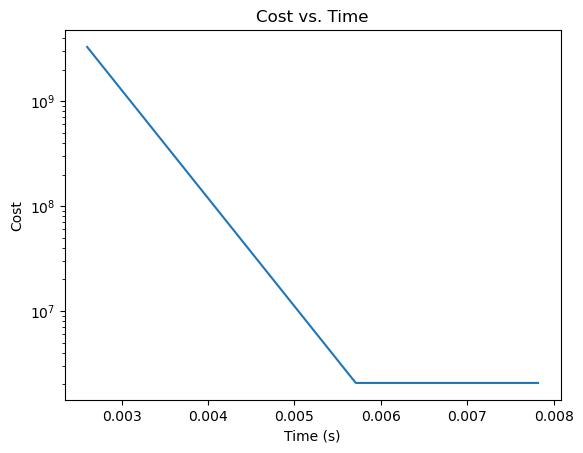

Iteration: 0, Loss: 3294226893.981472


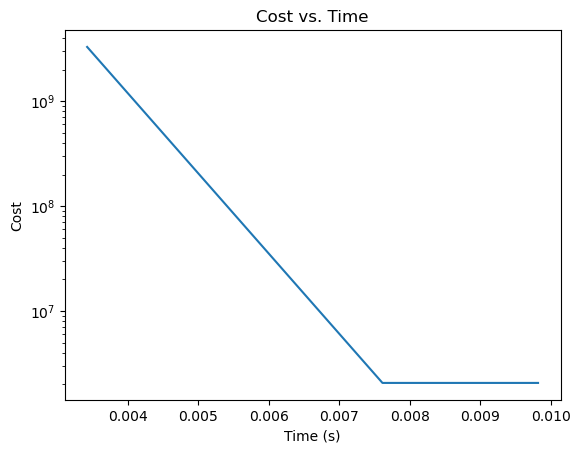

Iteration: 0, Loss: 3294226918.219933


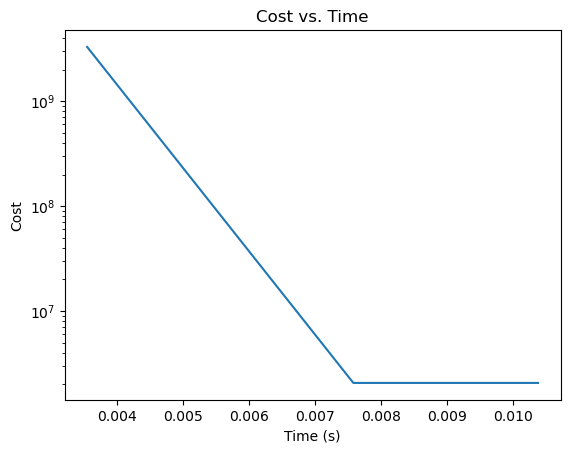

Iteration: 0, Loss: 3294227354.512228


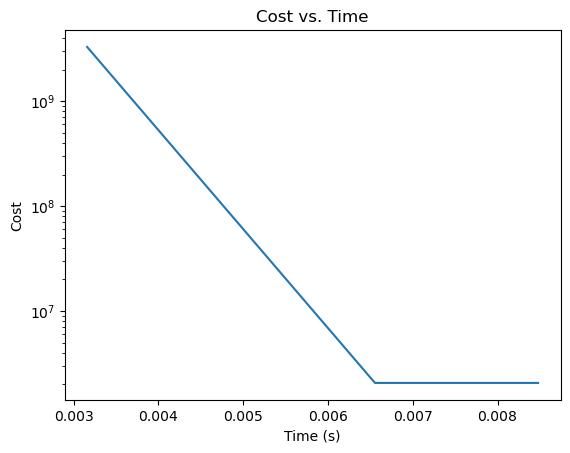

Best Hyperparameters:
{'learning_rate': 0.003, 'threshold': 512, 'max_iterations': 3000, 'momentum_factor': 0.99, 'regularization_lambda': 0.001}


KeyError: 'thresholds'

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import time

def gradient(w, X, y):
    n = X.shape[0]
    diff = X.dot(w) - y.reshape(-1)
    grad = X.T.dot(diff) / n
    return grad

def projected_gradient_descent(X, y, learning_rate, threshold, max_iterations, regularization_lambda, momentum_factor):
    n, d = X.shape
    w = np.zeros(d)
    momentum = np.zeros(d)
    timestamps = []
    costs = [] 
    start_time = time.time()
    for iteration in range(max_iterations):
        grad = gradient(w, X, y)
        
        momentum = momentum * momentum_factor + learning_rate * grad  # Update momentum with Nesterov factor
        w_new = w - momentum
        
        # Apply non-negativity constraint
        w_new = np.maximum(0, w_new)
        
        # Compute the loss with regularization
        loss = (np.linalg.norm(X.dot(w_new) - y) ** 2 + regularization_lambda * np.linalg.norm(w_new) ** 2) / (2 * n)
        costs.append(loss)
        elapsed_time = time.time() - start_time
        timestamps.append(elapsed_time)
        
        if iteration % 400 == 0:
            print(f"Iteration: {iteration}, Loss: {loss}")
        
        if np.allclose(w, w_new):
            break
        
        w = w_new
    
    plt.plot(np.array(timestamps), costs)
    plt.xlabel("Time (s)")
    plt.ylabel("Cost")
    plt.title("Cost vs. Time")
    plt.yscale("log")  # Set y-axis to logarithmic scale
    plt.show()
    
    return w




# w = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iterations, regularization, momentum)


# Define the hyperparameter grid
learning_rates = [0.001,0.003,0.005, 0.008, 0.01, 0.08]
max_iterations = [1500, 3000]
momentum_factors = [0.9, 0.95, 0.99]
regularization_lambdas = [0.001,0.005, 0.01, 0.1]
thresholds = [512]
best_params = {}
best_loss = float('inf')

# Perform grid search
for learning_rate in learning_rates:
    for threshold in thresholds:
        for max_iter in max_iterations:
            for momentum_factor in momentum_factors:
                for regularization_lambda in regularization_lambdas:
                    # Perform projected gradient descent with current hyperparameters
                    weights = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iter, regularization_lambda, momentum_factor)
                    
                    # Compute the loss with current hyperparameters
                    loss = (np.linalg.norm(X_train.dot(weights) - y_train) ** 2 + regularization_lambda * np.linalg.norm(weights) ** 2) / (2 * len(X_train))
                    
                    # Update the best hyperparameters if the current loss is lower
                    if loss < best_loss:
                        best_loss = loss
                        best_params = {
                            'learning_rate': learning_rate,
                            'threshold': threshold,
                            'max_iterations': max_iter,
                            'momentum_factor': momentum_factor,
                            'regularization_lambda': regularization_lambda
                        }

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)
# Perform projected gradient descent with the best hyperparameters
best_weights = projected_gradient_descent(X_train, y_train, best_params['learning_rate'], best_params['thresholds'], best_params['max_iterations'], best_params['regularization_lambda'], best_params['momentum_factor'])
# best_weights = projected_gradient_descent(X_train, y_train, best_params['learning_rate'], best_params['threshold'], best_params['max_iterations'], best_params['regularization_lambda'], best_params['momentum_factor'])
print("Best Parameters:")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Max Iterations: {best_params['max_iterations']}")
print(f"Momentum Factor: {best_params['momentum_factor']}")
print(f"Regularization Lambda: {best_params['regularization_lambda']}")




In [93]:
print("Best Parameters:")
print(f"Learning Rate: 0.005")
print(f"Max Iterations: {best_params['max_iterations']}")
print(f"Momentum Factor: {best_params['momentum_factor']}")
print(f"Regularization Lambda: 0.001")



Best Parameters:
Learning Rate: 0.005
Max Iterations: 3000
Momentum Factor: 0.99
Regularization Lambda: 0.001


Iteration: 0, Loss: 2039999.080733937
Iteration: 400, Loss: 34178.22826567371
Iteration: 800, Loss: 2667.1369046189225
Iteration: 1200, Loss: 1656.4112121375538
{'learning_rate': 1e-05, 'max_iterations': 1500, 'momentum_factor': 0.99, 'regularization_lambda': 0.001}

Iteration: 0, Loss: 2039999.0807490107
Iteration: 400, Loss: 34178.98639827834
Iteration: 800, Loss: 2667.8447139626333
Iteration: 1200, Loss: 1657.2597661661077
{'learning_rate': 1e-05, 'max_iterations': 1500, 'momentum_factor': 0.99, 'regularization_lambda': 0.2}

Iteration: 0, Loss: 2039999.080733937
Iteration: 400, Loss: 34178.22826567371
Iteration: 800, Loss: 2667.1369046189225
Iteration: 1200, Loss: 1656.4112121375538
Iteration: 1600, Loss: 1260.4830056678204
Iteration: 2000, Loss: 1013.4510972451154
Iteration: 2400, Loss: 845.2739091119605
Iteration: 2800, Loss: 723.4383597364684
{'learning_rate': 1e-05, 'max_iterations': 3000, 'momentum_factor': 0.99, 'regularization_lambda': 0.001}

Iteration: 0, Loss: 2039999.080

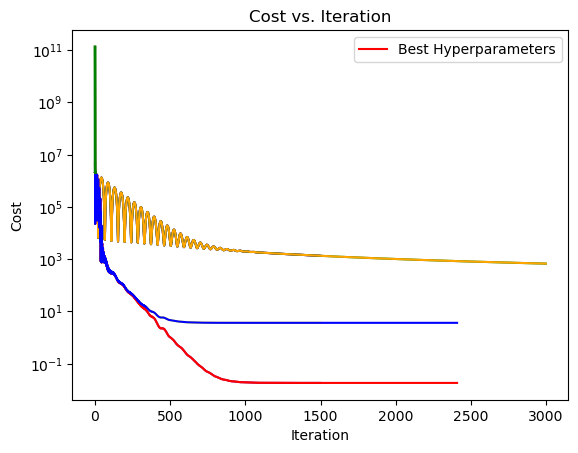

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import time
import itertools

def gradient(w, X, y):
    n = X.shape[0]
    diff = X.dot(w) - y.reshape(-1)
    grad = X.T.dot(diff) / n
    return grad

def projected_gradient_descent(X, y, learning_rate, threshold, max_iterations, regularization_lambda, momentum_factor):
    n, d = X.shape
    w = np.zeros(d)
    momentum = np.zeros(d)
    timestamps = []
    costs = [] 
    start_time = time.time()
    for iteration in range(max_iterations):
        grad = gradient(w, X, y)
        
        momentum = momentum * momentum_factor + learning_rate * grad  # Update momentum with Nesterov factor
        w_new = w - momentum
        
        # Apply non-negativity constraint
        w_new = np.maximum(0, w_new)
        
        # Compute the loss with regularization
        loss = (np.linalg.norm(X.dot(w_new) - y) ** 2 + regularization_lambda * np.linalg.norm(w_new) ** 2) / (2 * n)
        costs.append(loss)
        elapsed_time = time.time() - start_time
        timestamps.append(elapsed_time)
        
        if iteration % 400 == 0:
            print(f"Iteration: {iteration}, Loss: {loss}")
        
        if np.allclose(w, w_new):
            break
        
        w = w_new
    
    return w, costs, timestamps


# Rest of the code...
# Define the hyperparameter grid
learning_rates = [ 0.00001, 0.005, 0.5]
max_iterations = [1500, 3000]
momentum_factors = [0.99]
regularization_lambdas = [0.001, 0.2]
thresholds = [512]
best_params = {}
best_loss = float('inf')

# Initialize costs_2d list to store costs for each hyperparameter setting
costs_2d = []

# Perform grid search
colors = itertools.cycle(['red', 'blue', 'green', 'orange', 'purple', 'yellow'])
best_color = 'green'
for learning_rate in learning_rates:
    for threshold in thresholds:
        for max_iter in max_iterations:
            for momentum_factor in momentum_factors:
                for regularization_lambda in regularization_lambdas:
                    # Perform projected gradient descent with current hyperparameters
                    weights, costs, timestamps = projected_gradient_descent(X_train, y_train, learning_rate, threshold, max_iter, regularization_lambda, momentum_factor)
                    
                    # Append the costs for current hyperparameters to the 2-dimensional cost vector
                    costs_2d.append(costs)

                    # Compute the loss with current hyperparameters
                    loss = (np.linalg.norm(X_train.dot(weights) - y_train) ** 2 + regularization_lambda * np.linalg.norm(weights) ** 2) / (2 * len(X_train))
                    params = {
                        'learning_rate': learning_rate,
                        'max_iterations': max_iter,
                        'momentum_factor': momentum_factor,
                        'regularization_lambda': regularization_lambda
                    }
                    print(params)
                    print()

                    # Update the best hyperparameters if the current loss is lower
                    if loss < best_loss:
                        best_loss = loss
                        best_params = {
                            'learning_rate': learning_rate,
                            'max_iterations': max_iter,
                            'momentum_factor': momentum_factor,
                            'regularization_lambda': regularization_lambda
                        }

# Plot the cost vs. iteration for each hyperparameter setting
for i in range(len(costs_2d)):
    if i == len(costs_2d) - 1:
        plt.plot(range(len(costs_2d[i])), costs_2d[i], color=best_color, linewidth=2)
    else:
        plt.plot(range(len(costs_2d[i])), costs_2d[i], color=next(colors))

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Plot settings
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs. Iteration")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.legend(['Best Hyperparameters'])
plt.show()
